Project Notes:
- Dataset: https://www.kaggle.com/prachi13/customer-analytics
- How to export google colab as html: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab

# Libraries

In [1798]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches, rcParams
from scipy import stats

In [1799]:
# rcParams['figure.figsize'] = (8,5)
# rcParams['lines.linewidth'] = 2.5
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
custom_params = {
    'figure.figsize':(8,5),
    'lines.linewidth':2.5,
    'axes.titlesize':20,
    'axes.labelsize':16,
    'xtick.labelsize':14,
    'ytick.labelsize':14,
    'axes.spines.right':False,
    'axes.spines.top':False
}
sns.set_theme(style='ticks', font_scale=1.25, context='notebook', rc=custom_params, palette='Set2')

In [1800]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1801]:
# colors
red = '#E33131'
blue = '#3772FF'
gray = '#C0C5C1'
darkgray = '#858786'
yellow = '#F5D491'
orange = '#E89005'
black = '#080708'
white = '#FEFFFE'
green = '#4CB944'

In [1802]:
url = 'https://raw.githubusercontent.com/fnurrahmadi/data-science-portfolio/main/E-Commerce%20Shipping%20Data/csv/Train.csv'

# Data Overview

In [1803]:
df = pd.read_csv(url)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [1804]:
columns = [col.lower() if col!='Reached.on.Time_Y.N' else 'late_delivery' for col in df.columns]
df.columns = columns
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'product_importance', 'gender', 'discount_offered', 'weight_in_gms', 'late_delivery'], dtype='object')

Untuk memudahkan penggunaan kolom-kolom yang ada, semua kolom dibuat menjadi lowercase, dan kolom yang ambigu diubah menjadi lebih jelas. Jadi, kolom dari dataset ini menjadi:

- id
- warehouse_block
- mode_of_shipment
- customer_care_calls
- customer_rating
- cost_of_the_product
- prior_purchases
- product_importance
- gender
- discount_offered
- weight_in_gms
- late_delivery

Pada variabel target kita yakni late_delivery, berikut adalah penjelasan valuenya:
- 1 == did not reach on time
- 0 == reached on time

In [1805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  late_delivery        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [1806]:
df.duplicated().sum()

0

In [1807]:
df.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
late_delivery          0
dtype: int64

In [1808]:
nums = [col for col in df.columns if df[col].dtype != 'O']
cats = [col for col in df.columns if df[col].dtype == 'O']
print('Numerical:',nums)
print('Categorical:',cats)

Numerical: ['id', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'late_delivery']
Categorical: ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']


In [1809]:
df[nums].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,5500.00,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,3175.28,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,1.00,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,2750.50,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,5500.00,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,8249.50,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,10999.00,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


In [1810]:
df[cats].describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [1811]:
for col in cats:
  print(col,':')
  print(df[col].value_counts(dropna=False),'\n')

warehouse_block :
F    3666
D    1834
A    1833
B    1833
C    1833
Name: warehouse_block, dtype: int64 

mode_of_shipment :
Ship      7462
Flight    1777
Road      1760
Name: mode_of_shipment, dtype: int64 

product_importance :
low       5297
medium    4754
high       948
Name: product_importance, dtype: int64 

gender :
F    5545
M    5454
Name: gender, dtype: int64 



Hasil observasi dari descriptive statistics:
- Tidak ada kolom yang tipe datanya salah.
- Terdapat sebanyak 10999 rows dan tidak ada data yang null.
- Dari kolom numerikal, tidak terdapat nilai yang isinya salah, karena tipe data integer sudah menandakan bahwa semua datanya sudah numerik.
- Dari kolom categorical, value counts menunjukkan bahwa setiap unique value masuk akal dan tidak ada yang salah.
- Baik dari kolom numerikal maupun kolom kategorikal, tidak ada nilai summary yang tidak masuk akal.

Insights dari descriptive statistics:
- Kolom **Customer_care_calls** dan **Customer_rating** terlihat distribusinya cukup simterik (*Mean* dan *Median* tidak berbeda jauh).
- Kolom **Prior_purchases** dan **Discount_offered** terlihat Positively Skewd.
- Kolom **Reached.on.Time_Y.N** bernilai boolean.
- **Mode_of_Shipment** paling banyak dilakukan dengan melewati jalur laut *(ship)* sebanyak 7462.
- **Warehouse_block** untuk pengiriman paling banyak dari *Warehouse F* sebanyak 3666.
- **Product_importance** paling banyak dengan kategori *Low* sebanyak 5297.
- **Gender** paling banyak melakukan transaksi berasal dari *Female* sebanyak 5545.

# EDA

## Univariate Analysis

### Numerical

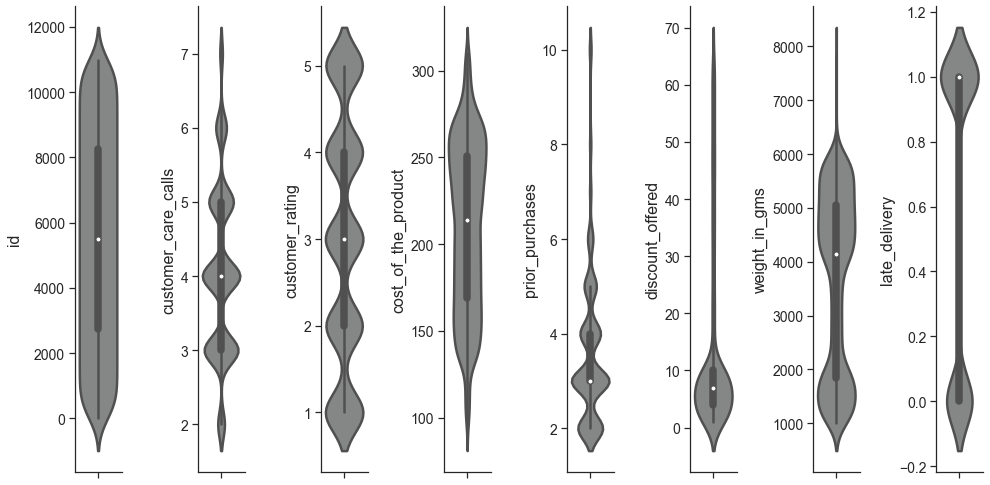

In [15]:
plt.figure(figsize=(14,7))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color=darkgray, orient='v')
    plt.tight_layout()

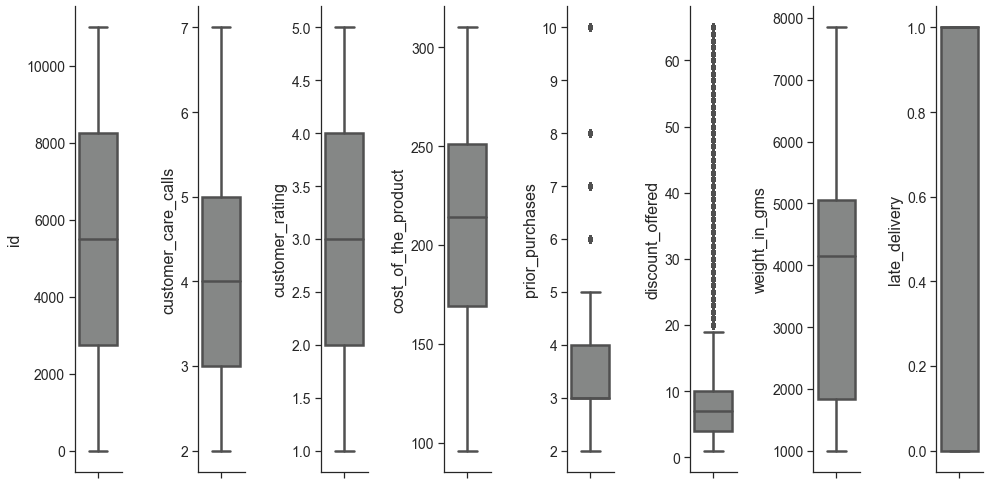

In [16]:
features = nums
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color=darkgray, orient='v')
  plt.tight_layout()

Insight:
- Terdapat outlier pada kolom `Prior_purchases` dan `Discount_offered`

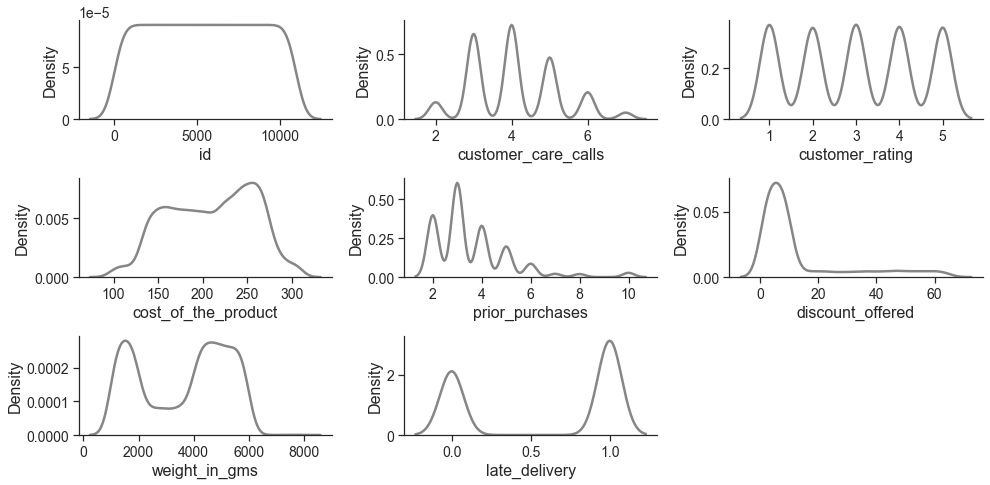

In [17]:
features = nums
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(x=df[features[i]], color=darkgray)
  plt.xlabel(features[i])
  plt.tight_layout()

Insight:
- Terlihat bahwa kolom `Prior_purchases` cenderung skew ke kanan dan kolom `Discount_offered` skew ke kanan dengan buntut panjang
- Kita juga tahu bahwa pada kolom `Reached.on.Time_Y.N` barang yang tidak sampai tepat waktu lebih banyak di banding yang tepat waktu
- `Customer_care_calls` memiliki mode pada angka 4 dan cenderung skew ke kanan
- `Customer_rating` memiliki distribusi uniform
- `Cost_of_the_product` dan `Weight_in_gms` memiliki distribusi bimodal

Notes untuk data preprocessing:
- `Prior_purchases` dan `discount_offered` dapat ditransformasi menggunakan log transformation karena positively skewed
- `Cost_of_the_product` dan `Weight_in_gms` yang memiliki distribusi bimodal dapat ditransformasi menggunakan formula tersebut --> abs(data) - mean(data)

### Categorical

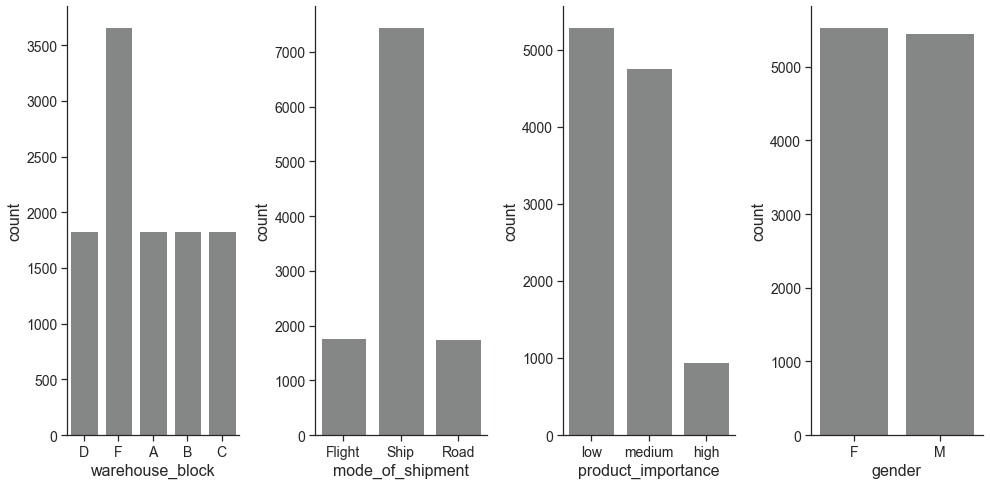

In [18]:
features = cats
plt.figure(figsize=(14,7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color=darkgray)
plt.tight_layout()

Insight:
- Warehouse block F memiliki shipment paling banyak
- Ship adalah shipment mode yang paling sering digunakan
- Pada product importance, low adalah yang paling banyak, lalu medium, dan baru high, dengan jumlah yang sangat sedikit jika dibandingkan dengan group lainnya
- Secara gender, tidak ada perbedaan jumlah shipment

## Multivariate Analysis

<AxesSubplot:>

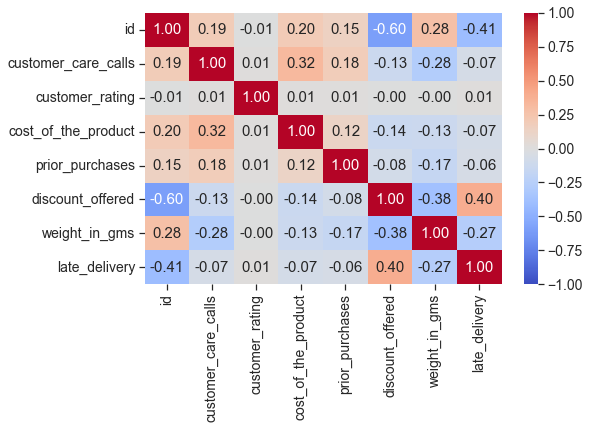

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')

Insight:
- `id` memiliki korelasi negatif dengan target `Reached.on.Time_Y.N` yaitu sebesar -0.41
- `Discount_offered` memiliki korelasi positif dengan target `Reached.on.Time_Y.N` yaitu sebesar 0.40
- `Weight_in_gms` memiliki korelasi negatif dengan target `Reached.on.Time_Y.N` yaitu sebesar -0.27

In [20]:
nums

['id',
 'customer_care_calls',
 'customer_rating',
 'cost_of_the_product',
 'prior_purchases',
 'discount_offered',
 'weight_in_gms',
 'late_delivery']

id


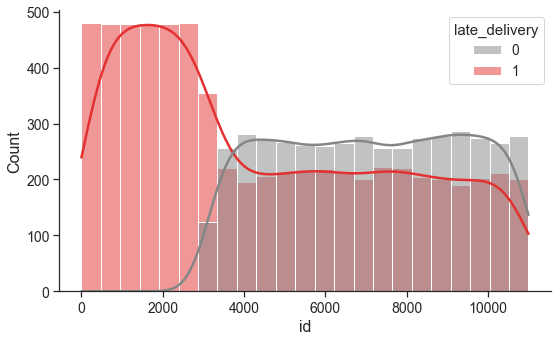

customer_care_calls


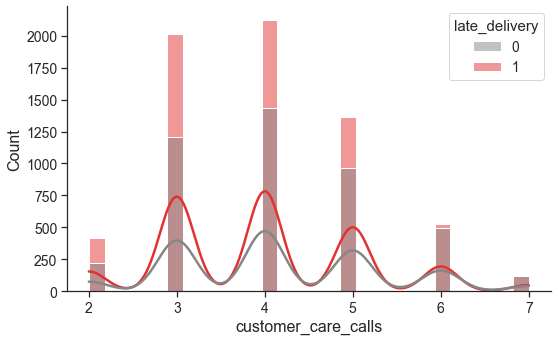

customer_rating


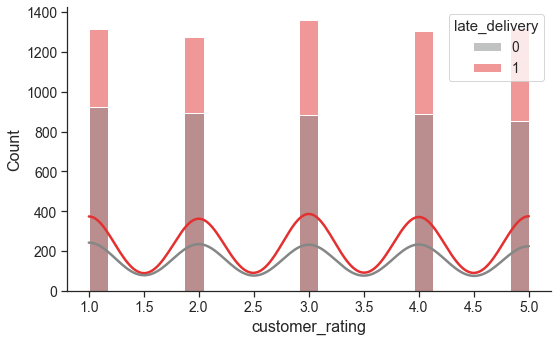

cost_of_the_product


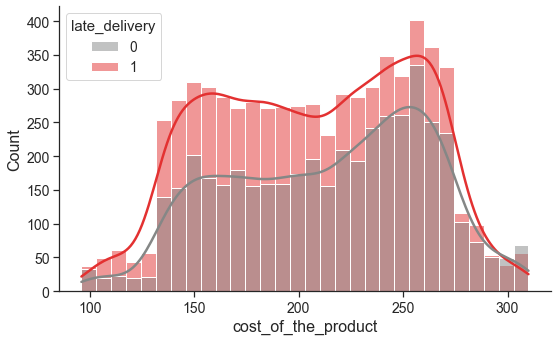

prior_purchases


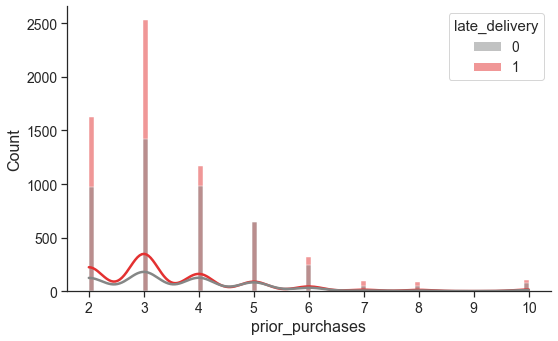

discount_offered


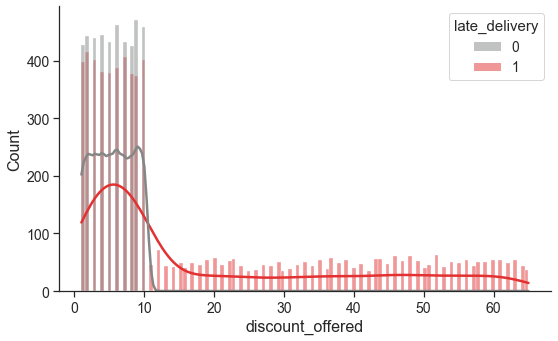

weight_in_gms


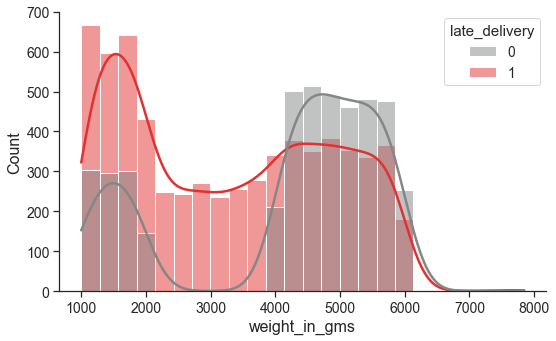

late_delivery


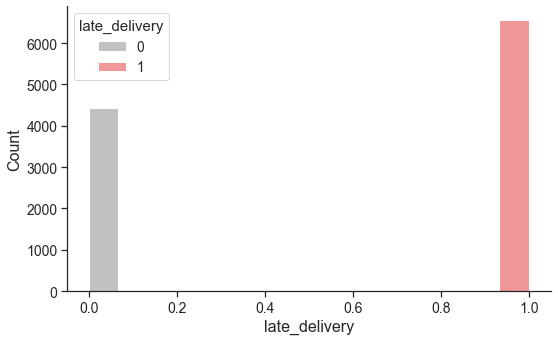

In [21]:
for col in nums:
    print(col)
    sns.histplot(data=df, x=col, hue='late_delivery', palette=[darkgray, red], kde=True)
    plt.tight_layout()
    plt.show()

id


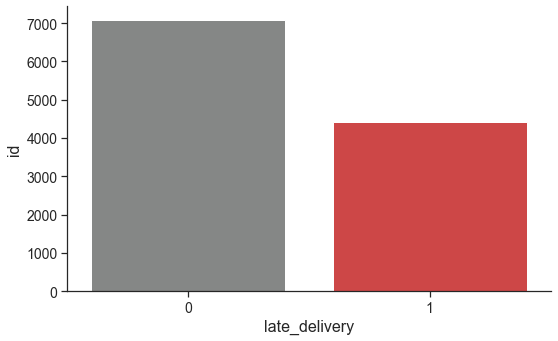

customer_care_calls


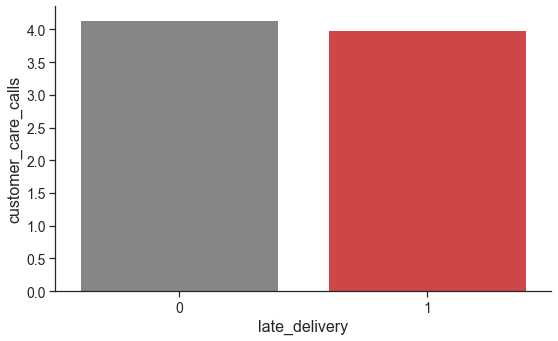

customer_rating


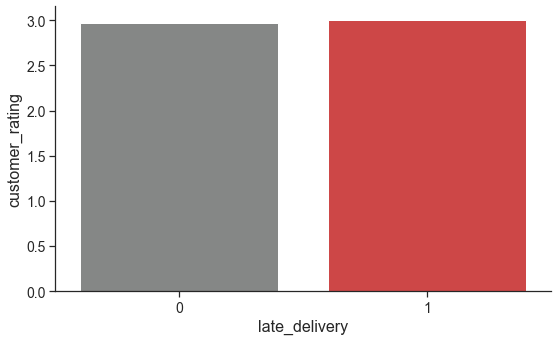

cost_of_the_product


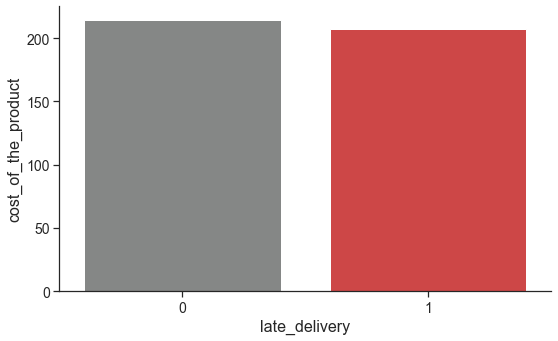

prior_purchases


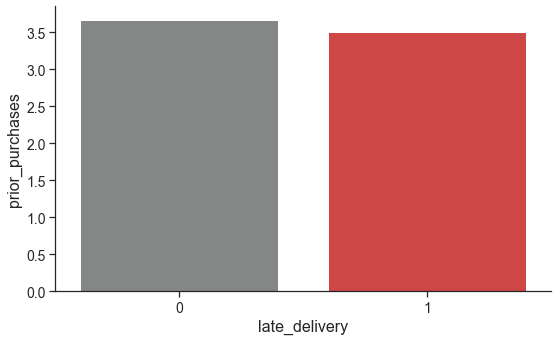

discount_offered


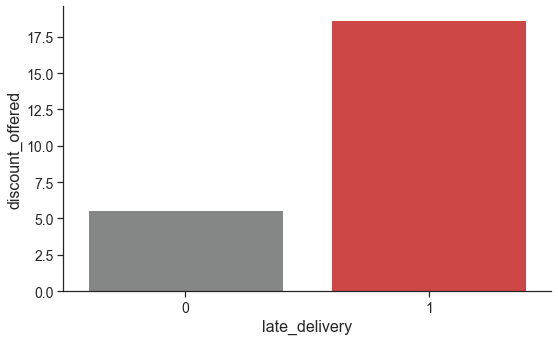

weight_in_gms


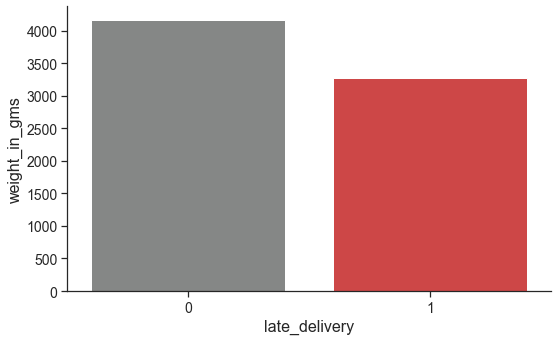

late_delivery


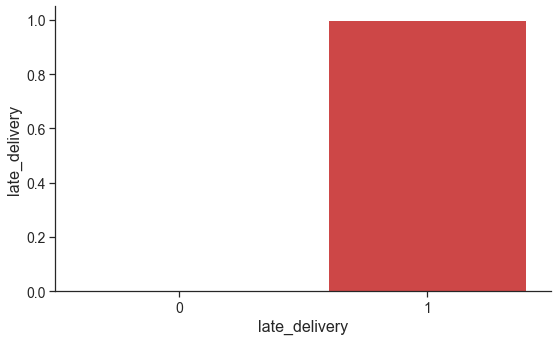

In [22]:
for col in nums:
    print(col)
    sns.barplot(data=df, x='late_delivery', y=col, palette=[darkgray, red], ci=None)
    plt.tight_layout()
    plt.show()

In [23]:
cats

['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']

warehouse_block


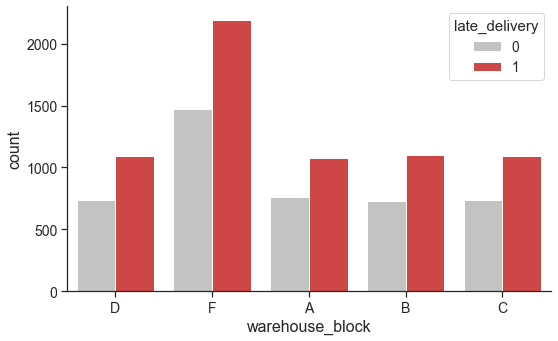

mode_of_shipment


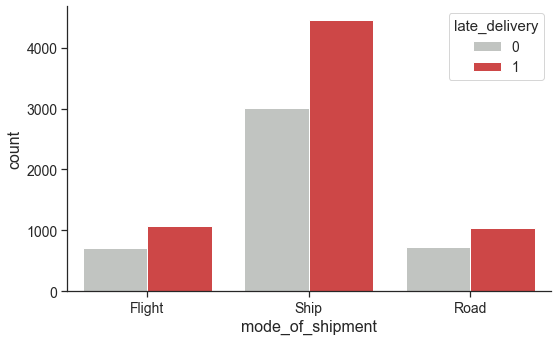

product_importance


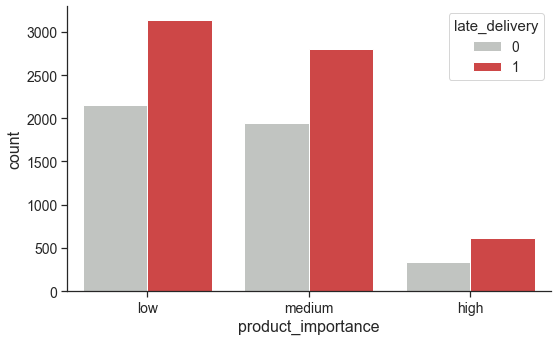

gender


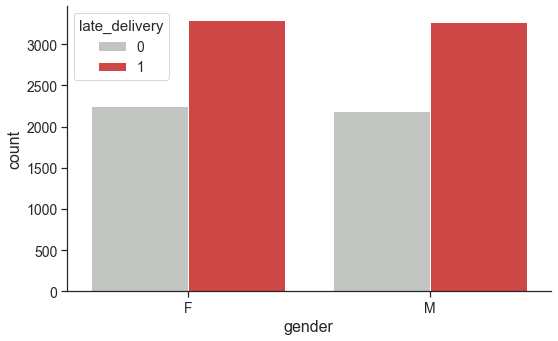

In [24]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col, hue='late_delivery', palette=[gray, red])
    plt.tight_layout()
    plt.show()

Insight:
- Warehouse block F memiliki late delivery paling banyak diantara semua warehouse block
- Ship memiliki late delivery paling banyak dari semua mode shipment
- Terdapat late delivery paling banyak di low product importance, lalu medium
- Secara gender, tidak ada beda jumlah late delivery

<Figure size 576x576 with 0 Axes>

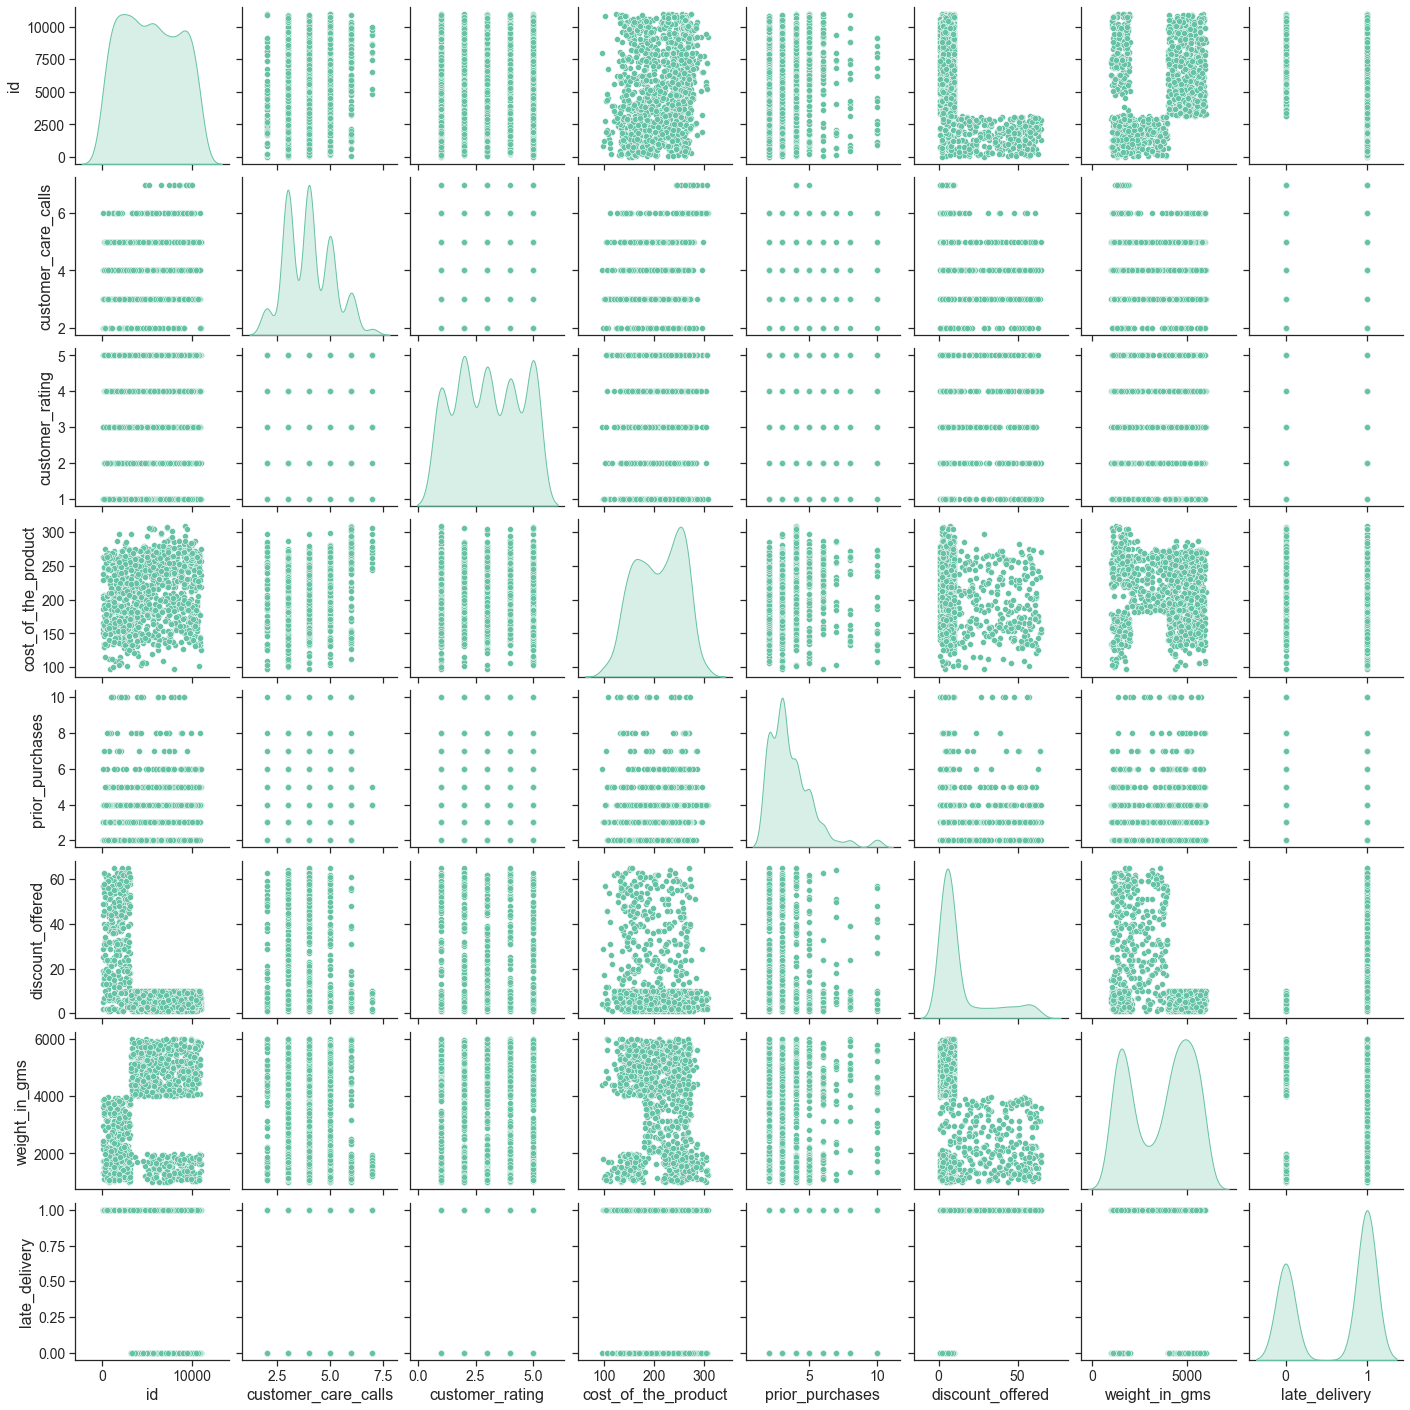

In [25]:
plt.figure(figsize=(8, 8))
sns.pairplot(df.sample(frac=0.1), diag_kind='kde', palette=darkgray)
plt.show()

Insight:
- beberapa feature yang memiliki korelasi cukup kuat dengan label (Reached.on.Time_Y.N) adalah discount_offered dan id
- secara umum, tidak ada antar feature yang memiliki korelasi yang kuat



In [26]:
dfg = df.groupby(['late_delivery',]).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms        customer_rating        customer_care_calls       
              nunique            mean median                mean median             mean median          mean median            mean median                mean median
late_delivery                                                                                                                                                         
0                4436        3.670424      3          214.498647    222         5.545987      6   4168.668395   4674        2.967989      3            4.147656      4
1                6563        3.498095      3          207.289197    209        18.663721      9   3272.640104   3231        3.005790      3            3.991467      4

Insight:
- Kemungkinan cost of product sudah termasuk discount offered, karena cost of product semakin rendah, discount semakin tinggi
- Weight in gms untuk barang yang on time justru lebih ringan daripada barang yang late

In [27]:
dfg = df.groupby(['late_delivery','gender']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                     nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery gender                                                                                                                                                          
0             F         2249        3.670076      3          213.952868    220         5.583370      6   4169.104046  4677.0        2.943975      3            4.148066      4
              M         2187        3.670782      3          215.059899    223         5.507545      5   4168.220393  4668.0        2.992684      3            4.147234      4
1             F         3296        3.521541      3          206.049454    207        19.006978      9   3259.155947  3151.5        3.015777      3            3.985740      4
              M         3267        3.474441      3          208.539945    212        18.317417      9   3286.243955  3307.0        2.995715      3            3.997245      4

Insight:
- Tidak jauh perbedaan antara Male dan Female, ketika dibedakan late delivery dan on time delivery

In [28]:
dfg = df.groupby(['late_delivery','warehouse_block']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms        customer_rating        customer_care_calls       
                              nunique            mean median                mean median             mean median          mean median            mean median                mean median
late_delivery warehouse_block                                                                                                                                                         
0             A                   758        3.630607      3          214.216359    223         5.526385      5   4140.250660   4661        2.930079      3            4.171504      4
              B                   729        3.758573      3          216.736626    224         5.577503      6   4183.167353   4686        2.980796      3            4.083676      4
              C                   739        3.607578      3          214.654939    221         5.430311      5   4177.474966   4638        2.956698      3            4.148850      4
              D                   738        3.772358      4          214.563686    219         5.604336      6   4130.554201   4632        3.033875      3            4.146341      4
              F                  1472        3.627717      3          213.424592    222         5.569293      6   4190.809103   4724        2.953804      3            4.167120      4
1             A                  1075        3.540465      3          204.925581    205        18.649302      9   3245.402791   3185        2.976744      3            3.944186      4
              B                  1104        3.453804      3          209.136775    213        18.211957      9   3274.194746   3213        2.980072      3            3.978261      4
              C                  1094        3.519196      3          208.851920    209        18.783364      9   3279.164534   3181        3.019196      3            4.008227      4
              D                  1096        3.487226      3          208.446168    212        18.136861      9   3291.018248   3287        3.007299      3            3.990876      4
              F                  2194        3.494531      3          206.160438    208        19.101641      9   3272.769371   3235        3.025524      3            4.013218      4

Insight:
- Warehouse block F memiliki shipment terbanyak, mau late atau tidak
- Warehouse selain F memiliki angka shipment dan nilai-nilai yang serupa
- Pada setiap warehouse, rasio late delivery serupa

In [29]:
dfg = df.groupby(['late_delivery','mode_of_shipment']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                               nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery mode_of_shipment                                                                                                                                                          
0             Flight               708        3.738701      3          213.408192    222         5.528249      6   4116.878531  4631.5        2.975989      3            4.182203      4
              Road                 725        3.689655      3          215.394483    222         5.466207      5   4122.776552  4632.0        2.988966      3            4.211034      4
              Ship                3003        3.649684      3          214.539461    221         5.569431      6   4191.958042  4704.0        2.961039      3            4.124209      4
1             Flight              1069        3.452760      3          206.590271    209        18.216090      9   3306.506080  3372.0        2.986904      3            4.052385      4
              Road                1035        3.505314      3          207.029952    208        18.420290      9   3318.063768  3236.0        3.000000      3            3.959420      4
              Ship                4459        3.507289      3          207.516932    210        18.827540      9   3253.977573  3181.0        3.011662      3            3.984301      4

Insight:
- Mode shipment Ship digunakan paling banyak, mau late atau tidak
- Flight dan road memiliki nilai yang kurang lebih sama
- Rasio late delivery pada setiap shipment mode serupa

In [30]:
dfg = df.groupby(['late_delivery','product_importance']).agg({
                                   'id':'nunique',
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

id prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                                 nunique            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery product_importance                                                                                                                                                          
0             high                   332        3.813253      3          207.530120    211         5.207831      5   4788.722892  4923.5        2.990964      3            3.885542      4
              low                   2157        3.639777      3          216.759388    224         5.618452      6   4002.271210  4625.0        2.991655      3            4.231803      4
              medium                1947        3.680021      3          213.182332    220         5.523369      6   4247.281972  4677.0        2.937853      3            4.099127      4
1             high                   616        3.573052      3          201.899351    202        19.764610      9   3583.452922  3798.0        2.995130      3            3.865260      4
              low                   3140        3.451592      3          208.831529    212        18.143312      9   3150.732484  2935.0        2.978025      3            4.026752      4
              medium                2807        3.533666      3          206.746705    208        19.004275      9   3340.801568  3382.0        3.039188      3            3.979694      4

Insight:
- High memiliki angka shipment yang kecil sendiri, low adalah terbanyak dan diikuti medium
- Product cost terurut dari paling mahal ke kecil dengan urutan: low, medium, high, dan product cost late delivery sedikit lebih murah daripada on time delivery
- Discount untuk late delivery jauh lebih banyak dibanding on time
- Weight in gms terurut dari paling berat ke ringan dengan urutan: low, medium, high, dan berat late delivery lebih ringan daripada on time delivery

Kesimpulan untuk fitur yang akan dipakai:
- Dari fitur numerikal, yang berkorelasi dengan target adalah `id`, `discount_offered`, `weight_in_gms`
- Dari fitur kategorikal, yang terlihat ada relevansi dengan target adalah `warehouse_block`, `mode_of_shipment`, dan `product_importance`

# Business Insights

- https://www.wrike.com/blog/customer-retention-more-important-than-new-revenue/#:~:text=Increasing%20revenue%20through%20customer%20retention,working%20harder%20instead%20of%20smarter.
- https://www.hollingsworthllc.com/how-late-deliveries-impact-customer-retention/#:~:text=Late%20deliveries%20decrease%20your%20customer,customers%20in%20the%20first%20place).

In [31]:
df.groupby('late_delivery').agg({'prior_purchases':'mean'})

,prior_purchases
late_delivery,
0,3.670424
1,3.498095


In [32]:
df.groupby(['product_importance','late_delivery']).agg({'customer_care_calls':'count'})

customer_care_calls
product_importance late_delivery                     
high               0                              332
                   1                              616
low                0                             2157
                   1                             3140
medium             0                             1947
                   1                             2807

In [33]:
dfg = df.groupby(['product_importance','late_delivery']).agg({'customer_care_calls':'sum'}).reset_index()
# dfg.plot(kind='bar')
dfg

,product_importance,late_delivery,customer_care_calls
0,high,0,1290
1,high,1,2381
2,low,0,9128
3,low,1,12644
4,medium,0,7981
5,medium,1,11171


<AxesSubplot:xlabel='product_importance', ylabel='customer_care_calls'>

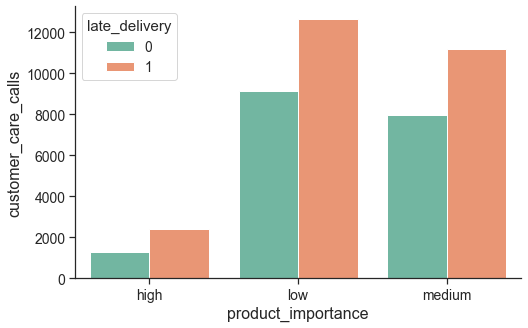

In [34]:
sns.barplot(data=dfg, y='customer_care_calls', x='product_importance', hue='late_delivery')

<AxesSubplot:xlabel='customer_care_calls', ylabel='cost_of_the_product'>

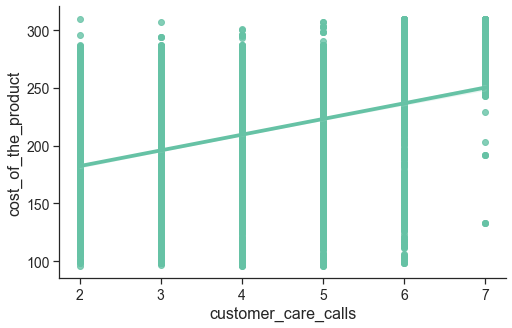

In [35]:
sns.regplot(data=df, y='cost_of_the_product', x='customer_care_calls')

Insight:
- Dari regplot di atas, terlihat bahwa yang menelpon lebih banyak adalah yang memesan barang yang lebih mahal

In [36]:
dfg = df.groupby('late_delivery').agg({'id':'nunique'})
dfg['ratio'] = round(100*dfg['id']/len(df),2)
dfg

,id,ratio
late_delivery,,
0,4436,40.33
1,6563,59.67


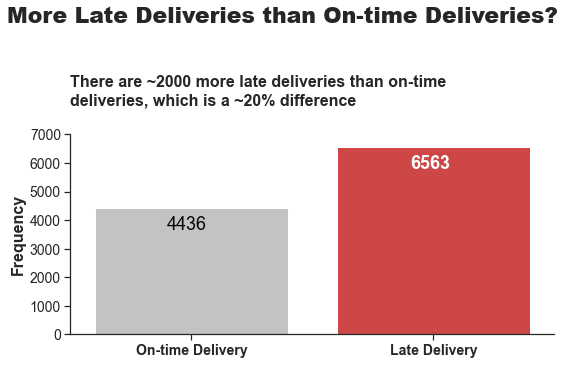

In [37]:
plt.figure()
ax = sns.countplot(data=df, x='late_delivery', palette=[gray,red])
for p in ax.patches:
  color=white if p.get_height()>5000 else black
  fontweight='semibold' if p.get_height()>=dfg['id'].max()-1 else 'normal'
  ax.annotate(str(round(p.get_height(),2)), ((-0.1+p.get_x()+p.get_width()/2)*1.005, -800+(p.get_height() * 1.005)), color=color, fontsize=18, fontweight=fontweight)

plt.suptitle('More Late Deliveries than On-time Deliveries?',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('There are ~2000 more late deliveries than on-time\ndeliveries, which is a ~20% difference',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylim((0,7000))
plt.xlabel('', fontweight='semibold')
plt.ylabel('Frequency', fontweight='semibold')
plt.xticks(rotation=0, ticks=np.arange(2), labels=['On-time Delivery', 'Late Delivery'], fontweight='semibold')
plt.tight_layout()
plt.show()

Insight:
- Dari 11000 total shipment, 60% adalah late deliveries, yakni 20% lebih banyak dari on-time deliveries.
- On time delivery rate (banyaknya on time delivery dibagi total delivery) hanya sebesar ~40% dan perlu ditingkatkan oleh bisnis ecommerce

In [38]:
dfg1 = df[df['late_delivery']==1].groupby(['customer_care_calls']).agg({'id':'nunique'}).reset_index()
dfg1['ratio'] = round(100*dfg1['id']/len(df),2)
dfg1['rel_ratio'] = round(100*dfg1['id']/dfg1['id'].sum(),2)
dfg1

,customer_care_calls,id,ratio,rel_ratio
0,2,416,3.78,6.34
1,3,2011,18.28,30.64
2,4,2126,19.33,32.39
3,5,1360,12.36,20.72
4,6,523,4.75,7.97
5,7,127,1.15,1.94


In [39]:
dfg2 = df[df['late_delivery']==0].groupby(['customer_care_calls']).agg({'id':'nunique'}).reset_index()
dfg2['ratio'] = round(100*dfg2['id']/len(df),2)
dfg2['rel_ratio'] = round(100*dfg2['id']/dfg2['id'].sum(),2)
dfg2

,customer_care_calls,id,ratio,rel_ratio
0,2,222,2.02,5.00
1,3,1206,10.96,27.19
2,4,1431,13.01,32.26
3,5,968,8.80,21.82
4,6,490,4.45,11.05
5,7,119,1.08,2.68


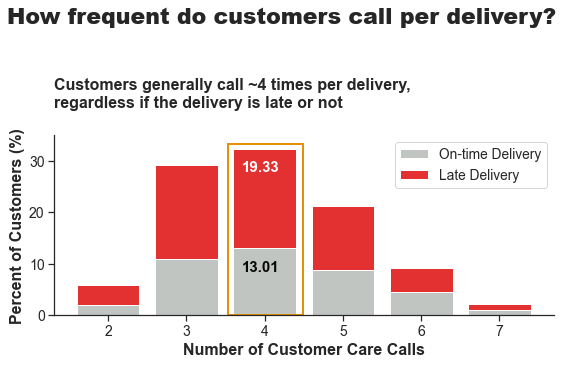

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(dfg2['customer_care_calls'], dfg2['ratio'], label='On-time Delivery', color=gray)
ax.bar(dfg1['customer_care_calls'], dfg1['ratio'], bottom=dfg2['ratio'], label='Late Delivery', color=red)

for p in ax.patches:
  color=white if p.get_y()>0 else black
  if p.get_x()== 3.6:
    ax.annotate(str(round(p.get_height(),2)), (0.095+(p.get_x() * 1.005), -4.5+(p.get_y() * 1.005)+(p.get_height())), color=color, fontweight='semibold')
  # print(p)

rect = patches.Rectangle((3.525, 0), 0.97, 33.25, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('How frequent do customers call per delivery?',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Customers generally call ~4 times per delivery,\nregardless if the delivery is late or not',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Percent of Customers (%)', fontsize=16, fontweight='semibold')
plt.xlabel('Number of Customer Care Calls', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
plt.ylim(0,35)
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- Customer umumnya melakukan customer care calls sebanyak kurang lebih 4 kali untuk setiap shipment, pada late delivery maupun on-time delivery.
- Apakah banyaknya customer care calls dipengaruhi oleh late delivery? (Dibuktikan dengan uji hipotesa)

In [41]:
dfg = df.groupby(['customer_care_calls',]).agg({'late_delivery':'sum','id':'nunique'})
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['abs_ratio'] = dfg['late_delivery']/len(df)
dfg

,late_delivery,id,rel_ratio,abs_ratio
customer_care_calls,,,,
2,416,638,0.652038,0.037822
3,2011,3217,0.625117,0.182835
4,2126,3557,0.597695,0.193290
5,1360,2328,0.584192,0.123648
6,523,1013,0.516288,0.047550
7,127,246,0.516260,0.011547


In [42]:
late_delivery = df[df['late_delivery']==1]
on_time_delivery = df[df['late_delivery']==0]

In [43]:
late_delivery['customer_care_calls'].mean()

3.9914673167758647

In [44]:
on_time_delivery['customer_care_calls'].mean()

4.147655545536519

In [45]:
tstat, p_value = st.ttest_ind(a=on_time_delivery['customer_rating'], b=late_delivery['customer_rating'])
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0 and Accept H1')

P-Value : 0.16890489722530824
Fail to Reject H0


Insight:
- Customer care calls dari on time delivery lebih banyak daripada late delivery, namun tidak signifikan
- Customer care calls tidak dipengaruhi oleh late delivery

<AxesSubplot:xlabel='customer_rating', ylabel='count'>

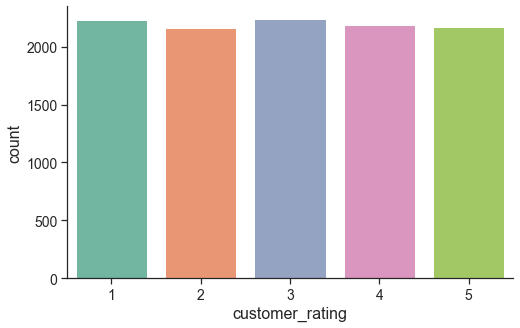

In [46]:
sns.countplot(data=df, x='customer_rating')

In [47]:
dfg = df.groupby(['customer_rating',]).agg({'late_delivery':'sum','id':'nunique'})
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['abs_ratio'] = dfg['late_delivery']/len(df)
dfg

,late_delivery,id,rel_ratio,abs_ratio
customer_rating,,,,
1,1313,2235,0.587472,0.119374
2,1273,2165,0.587991,0.115738
3,1357,2239,0.606074,0.123375
4,1303,2189,0.595249,0.118465
5,1317,2171,0.606633,0.119738


Insight:
- Nilai customer rating tidak dipengaruhi oleh late delivery (dibuktikan dengan uji hipotesa)

In [48]:
late_delivery = df[df['late_delivery']==1]
on_time_delivery = df[df['late_delivery']==0]

In [49]:
late_delivery['customer_rating'].mean()

3.005790035044949

In [50]:
on_time_delivery['customer_rating'].mean()

2.967989179440938

In [51]:
tstat, p_value = st.ttest_ind(a=on_time_delivery['customer_rating'], b=late_delivery['customer_rating'])
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0 and Accept H1')

P-Value : 0.16890489722530824
Fail to Reject H0


Insight:
- Terbukti bahwa late delivery / on-time delivery tidak mempengaruhi customer rating
- Customer rating tidak bisa menjadi 'measure of success' dari on time delivery rate

In [52]:
df.groupby('late_delivery').agg({'customer_care_calls':'mean',
                                       'customer_rating':'mean'})

,customer_care_calls,customer_rating
late_delivery,,
0,4.147656,2.967989
1,3.991467,3.005790


In [53]:
dfg = df.groupby(['warehouse_block', 'mode_of_shipment']).agg({'late_delivery':'sum',
                                                               'id':'nunique'
                                                               }).reset_index()
dfg['ratio'] = round(100*dfg['late_delivery']/len(df),2)
dfg['rel_ratio'] = round(100*dfg['late_delivery']/dfg['id'],2)
dfg['warehouse_shipment'] = dfg['warehouse_block']+' - '+dfg['mode_of_shipment']
dfg

,warehouse_block,mode_of_shipment,late_delivery,id,ratio,rel_ratio,warehouse_shipment
0,A,Flight,174,297,1.58,58.59,A - Flight
1,A,Road,168,294,1.53,57.14,A - Road
2,A,Ship,733,1242,6.66,59.02,A - Ship
3,B,Flight,177,296,1.61,59.80,B - Flight
4,B,Road,172,294,1.56,58.50,B - Road
5,B,Ship,755,1243,6.86,60.74,B - Ship
6,C,Flight,184,295,1.67,62.37,C - Flight
7,C,Road,169,294,1.54,57.48,C - Road
8,C,Ship,741,1244,6.74,59.57,C - Ship
9,D,Flight,178,297,1.62,59.93,D - Flight


In [54]:
dfg[dfg['mode_of_shipment']=='Flight']['ratio']+dfg[dfg['mode_of_shipment']=='Road']['ratio'].values

0     3.11
3     3.17
6     3.21
9     3.20
12    6.44
Name: ratio, dtype: float64

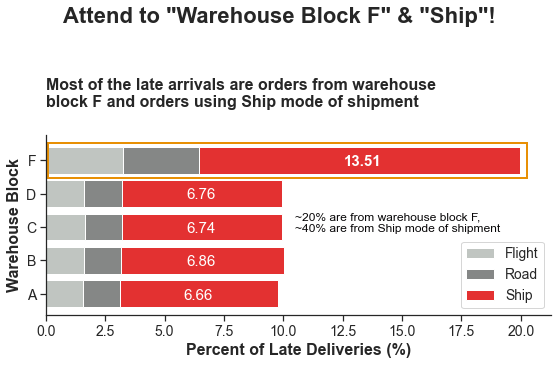

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dfg[dfg['mode_of_shipment']=='Flight']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Flight']['ratio'], label='Flight', color=gray)
ax.barh(dfg[dfg['mode_of_shipment']=='Road']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Road']['ratio'], label='Road', color=darkgray, left=dfg[dfg['mode_of_shipment']=='Flight']['ratio'])
ax.barh(dfg[dfg['mode_of_shipment']=='Ship']['warehouse_block'], dfg[dfg['mode_of_shipment']=='Ship']['ratio'], label='Ship', color=red, left=(dfg[dfg['mode_of_shipment']=='Flight']['ratio']+dfg[dfg['mode_of_shipment']=='Road']['ratio'].values))

for p in ax.patches:
  color=white
  fontweight='semibold' if p.get_width()>=dfg['ratio'].max()-1 else 'normal'
  if p.get_width()>6:
    ax.annotate(str(round(p.get_width(),2)), (-0.7+(p.get_x()+p.get_width()/2)*1.005, 0.23+p.get_y()*1.005), color=color, fontweight=fontweight)
  # print(p)

string='~20% are from warehouse block F,\n~40% are from Ship mode of shipment'
ax.annotate(string, (-2.75+(p.get_x()+p.get_width()/2)*1.005, -1.75+p.get_y()*1.005), color=black, fontsize=12)

rect = patches.Rectangle((0.1, 3.475), 20.15, 1.05, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('Attend to "Warehouse Block F" & "Ship"!',
             fontsize=22, fontweight='bold', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Most of the late arrivals are orders from warehouse\nblock F and orders using Ship mode of shipment',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Warehouse Block', fontsize=16, fontweight='semibold')
plt.xlabel('Percent of Late Deliveries (%)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- 20% dari late deliveries merupakan shipment dari warehouse block F.
- Bisakah shipment didistribusi untuk warehouse block lainnya secara evenly? (clearly there is an issue with product shipment distribution among the warehouse blocks)
- Perlu ditambah pekerja/couriers untuk warehouse block F? (allocating more workers in warehouse block F can maybe help the delay)
- 40% dari late deliveries merupakan shipment yang menggunakan Ship/kapal.
- Can we advise customers that ship method generally takes longer time to deliver and prolong expected arrival date? (see issues with cargo ships)

Links:
- http://www.pacificmarine.net/marine-deck/cargo-securing/how-do-container-ships-work.htm
- https://www.searates.com/blog/post/25-most-common-reasons-of-cargo-delays

<BarContainer object of 15 artists>

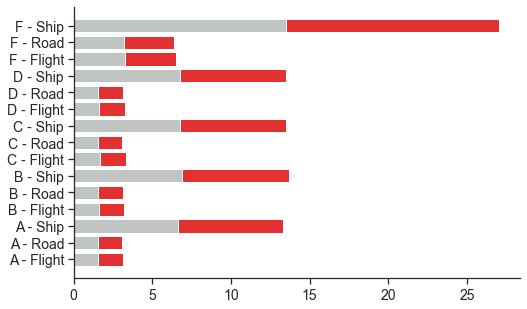

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dfg['warehouse_shipment'], dfg['ratio'], label='On-time Delivery', color=gray)
ax.barh(dfg['warehouse_shipment'], dfg['ratio'], left=dfg['ratio'], label='Late Deliveries', color=red)

In [57]:
df.groupby('warehouse_block').agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                           mean median                mean median             mean median          mean  median            mean median                mean median
warehouse_block                                                                                                                                                  
A                      3.577741      3          208.767594    212        13.222586      7   3615.448991  4127.0        2.957447      3            4.038189      4
B                      3.575014      3          212.159302    219        13.187125      7   3635.701037  4149.0        2.980360      3            4.020185      4
C                      3.554828      3          211.191489    214        13.399891      7   3641.331151  4182.0        2.993999      3            4.064921      4
D                      3.601963      3          210.907852    216        13.093784      7   3628.846783  4134.5        3.017993      3            4.053435      4
F                      3.548009      3          209.077196    213        13.668031      7   3641.387616  4153.5        2.996727      3            4.075014      4

In [58]:
dfg = df.groupby(['mode_of_shipment']).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                            mean median                mean median             mean median          mean  median            mean median                mean median
mode_of_shipment                                                                                                                                                  
Flight                  3.566685      3          209.306697    214        13.160945      7   3629.378165  4152.0        2.982555      3            4.104108      4
Road                    3.581250      3          210.475568    216        13.084091      7   3649.550568  4194.5        2.995455      3            4.063068      4
Ship                    3.564594      3          210.343072    214        13.491959      7   3631.457518  4141.5        2.991289      3            4.040606      4

In [59]:
dfg = df.groupby('product_importance').agg({'late_delivery':'sum',
                                            'id':'nunique'}).reset_index()
dfg['ontime'] = dfg['id']-dfg['late_delivery']
dfg['rel_ratio'] = dfg['late_delivery']/dfg['id']
dfg['late_ratio'] = round(100*dfg['late_delivery']/len(df),2)
dfg['ontime_ratio'] = round(100*dfg['ontime']/len(df),2)
dfg = dfg.sort_values('late_ratio', ascending=False)
dfg['product_importance'] = dfg['product_importance'].apply(lambda x: x.capitalize())
dfg

,product_importance,late_delivery,id,ontime,rel_ratio,late_ratio,ontime_ratio
1,Low,3140,5297,2157,0.592788,28.55,19.61
2,Medium,2807,4754,1947,0.590450,25.52,17.70
0,High,616,948,332,0.649789,5.60,3.02


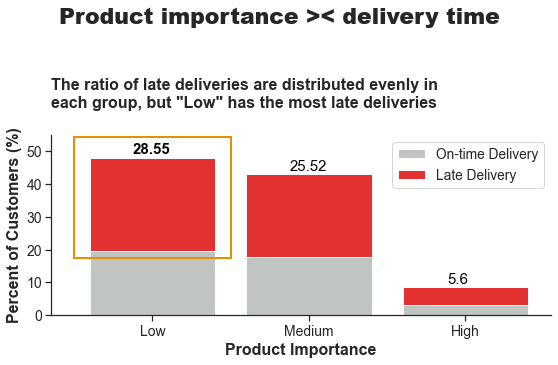

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(dfg['product_importance'], dfg['ontime_ratio'], label='On-time Delivery', color=gray)
ax.bar(dfg['product_importance'], dfg['late_ratio'], label='Late Delivery', color=red, bottom=dfg['ontime_ratio'])

for p in ax.patches:
  color=black
  fontweight='semibold' if p.get_height()>=dfg['late_ratio'].max()-1 else 'normal'
  if p.get_y()>0:
    ax.annotate(str(round(p.get_height(),2)), (0.275+(p.get_x()*1.005), 1+(p.get_y()*1.005)+(p.get_height())), color=color, fontweight=fontweight)
  # print(p)

rect = patches.Rectangle((-0.5, 17.5), 1, 37, linewidth=2, edgecolor=orange, facecolor='none')
ax.add_patch(rect)

plt.suptitle('Product importance >< delivery time',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('The ratio of late deliveries are distributed evenly in\neach group, but "Low" has the most late deliveries',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Percent of Customers (%)', fontsize=16, fontweight='semibold')
plt.xlabel('Product Importance', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
plt.ylim(0,55)
ax.legend()

plt.tight_layout()
plt.show()

Insight:
- 28.55% dari late deliveries adalah yang low importance.
- Secara relatif, setiap importance group memiliki rasio late deliveries yang serupa

In [61]:
dfg = df.groupby(['product_importance'], sort=False).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})
dfg

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms        customer_rating        customer_care_calls       
                              mean median                mean median             mean median          mean median            mean median                mean median
product_importance                                                                                                                                                 
low                       3.528224      3          212.059845  218.0        13.043043      7   3497.488956   4032        2.983576      3            4.110251      4
medium                    3.593605      3          209.382415  213.0        13.483172      7   3712.050484   4203        2.997686      3            4.028607      4
high                      3.657173      3          203.871308  205.5        14.666667      7   4005.551688   4408        2.993671      3            3.872363      4

In [62]:
dfg = df.groupby(['late_delivery','product_importance']).agg({'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],}).sort_values(('prior_purchases','mean'))
dfg

prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                                            mean median                mean median             mean median          mean  median            mean median                mean median
late_delivery product_importance                                                                                                                                                  
1             low                       3.451592      3          208.831529    212        18.143312      9   3150.732484  2935.0        2.978025      3            4.026752      4
              medium                    3.533666      3          206.746705    208        19.004275      9   3340.801568  3382.0        3.039188      3            3.979694      4
              high                      3.573052      3          201.899351    202        19.764610      9   3583.452922  3798.0        2.995130      3            3.865260      4
0             low                       3.639777      3          216.759388    224         5.618452      6   4002.271210  4625.0        2.991655      3            4.231803      4
              medium                    3.680021      3          213.182332    220         5.523369      6   4247.281972  4677.0        2.937853      3            4.099127      4
              high                      3.813253      3          207.530120    211         5.207831      5   4788.722892  4923.5        2.990964      3            3.885542      4

Insight:
- the higher the product importance, generally the heavier
- for late deliveries, more discounts are offered the higher the importance of the product
- the higher the importance of product, the lower the cost of product
- most likely cost of product takes into account of the discount offered

In [63]:
dfg = df.groupby(['late_delivery']).agg({'prior_purchases':'mean',
                                                                 'cost_of_the_product':'mean',
                                                                 'discount_offered':'mean',
                                                                 'weight_in_gms':'mean',
                                                                 'customer_care_calls':'mean',
                                                                 'customer_rating':'mean'})
dfg

,prior_purchases,cost_of_the_product,discount_offered,weight_in_gms,customer_care_calls,customer_rating
late_delivery,,,,,,
0,3.670424,214.498647,5.545987,4168.668395,4.147656,2.967989
1,3.498095,207.289197,18.663721,3272.640104,3.991467,3.005790


<AxesSubplot:xlabel='late_delivery', ylabel='weight_in_gms'>

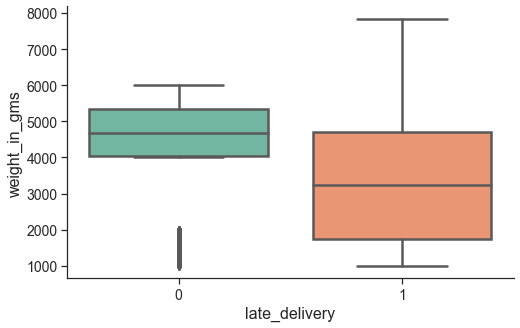

In [64]:
sns.boxplot(data=df, y='weight_in_gms', x='late_delivery')

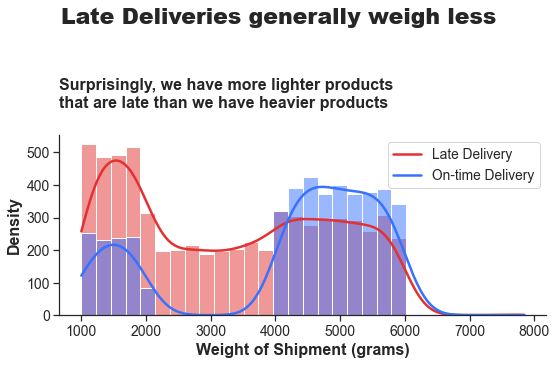

In [65]:
plt.figure(figsize=(8,5))
# ax = sns.kdeplot(data=df, x='weight_in_gms', hue='late_delivery', palette=[blue,red], fill=True, alpha=0.6, legend=False)
ax = sns.histplot(data=df, x='weight_in_gms', hue='late_delivery', palette=[blue,red], alpha=0.5, legend=False, bins=30, kde=True)

# rect = patches.Rectangle((800, 0.000088), 1600, 0.00011, linewidth=2, edgecolor=black, facecolor='none')
# ax.add_patch(rect)

plt.suptitle('Late Deliveries generally weigh less',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Surprisingly, we have more lighter products\nthat are late than we have heavier products',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Density', fontsize=16, fontweight='semibold')
plt.xlabel('Weight of Shipment (grams)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
# plt.ylim(0,0.00020)

plt.legend(title='', loc='upper right', labels=['Late Delivery', 'On-time Delivery'])
plt.tight_layout()
plt.show()

Insight:
- lighter products are more likely to be a late delivery

<AxesSubplot:xlabel='weight_in_gms', ylabel='Density'>

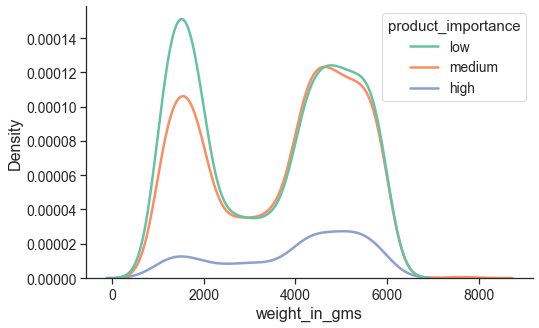

In [66]:
sns.kdeplot(data=df, x='weight_in_gms', hue='product_importance')

<AxesSubplot:xlabel='weight_in_gms', ylabel='Density'>

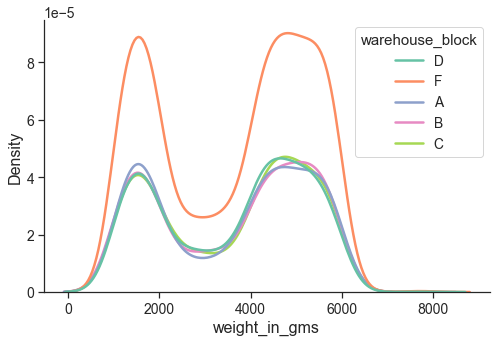

In [67]:
sns.kdeplot(data=df, x='weight_in_gms', hue='warehouse_block')

<AxesSubplot:xlabel='weight_in_gms', ylabel='Density'>

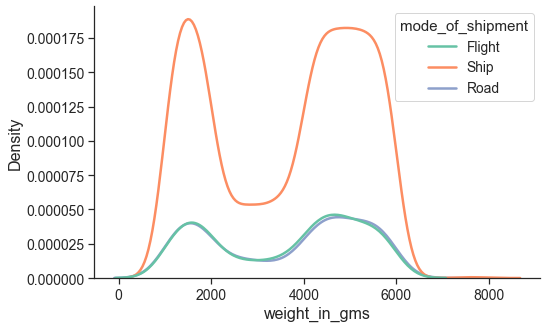

In [68]:
sns.kdeplot(data=df, x='weight_in_gms', hue='mode_of_shipment')

<AxesSubplot:xlabel='weight_in_gms', ylabel='cost_of_the_product'>

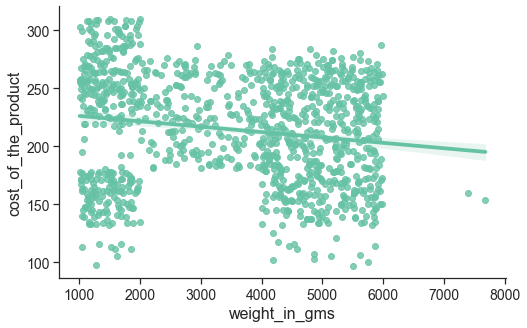

In [69]:
sns.regplot(data=df.sample(frac=0.1, random_state=13), x='weight_in_gms', y='cost_of_the_product')

In [70]:
df

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,late_delivery
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [71]:
high_calls = df[df['customer_care_calls']>4]
low_calls = df[df['customer_care_calls']<=4]

In [72]:
high_calls[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3587.0,6189.669362,3001.537152,18.0,3964.0,6538.0,8750.0,10998.0
customer_care_calls,3587.0,5.419571,0.617089,5.0,5.0,5.0,6.0,7.0
customer_rating,3587.0,3.005854,1.426277,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,3587.0,227.729300,49.672727,96.0,191.0,240.0,265.0,310.0
prior_purchases,3587.0,3.952607,1.338222,2.0,3.0,4.0,5.0,10.0
discount_offered,3587.0,11.121550,14.228466,1.0,4.0,7.0,10.0,65.0
weight_in_gms,3587.0,3049.156677,1689.841824,1001.0,1515.5,2201.0,4712.5,6000.0
late_delivery,3587.0,0.560357,0.496413,0.0,0.0,1.0,1.0,1.0


In [73]:
low_calls[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7412.0,5166.237992,3203.348149,1.0,2394.75,4871.5,7939.25,10999.0
customer_care_calls,7412.0,3.393821,0.641042,2.0,3.00,3.0,4.00,4.0
customer_rating,7412.0,2.983135,1.407466,1.0,2.00,3.0,4.00,5.0
cost_of_the_product,7412.0,201.712089,44.871997,96.0,163.75,202.0,241.00,310.0
prior_purchases,7412.0,3.381274,1.571166,2.0,2.00,3.0,4.00,10.0
discount_offered,7412.0,14.462898,16.974326,1.0,4.00,7.0,15.25,65.0
weight_in_gms,7412.0,3917.056800,1530.197027,1001.0,2522.00,4357.0,5171.00,7846.0
late_delivery,7412.0,0.614274,0.486799,0.0,0.00,1.0,1.00,1.0


Insight:
- high calls have generally higher product cost, higher prior purchases
- high calls have generally less discount offered, less weight in grams
- low calls have more late deliveries compared to high calls

In [74]:
high_calls[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,3587,5,F,1222
mode_of_shipment,3587,3,Ship,2395
product_importance,3587,3,low,1828
gender,3587,2,F,1808


In [75]:
low_calls[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,7412,5,F,2444
mode_of_shipment,7412,3,Ship,5067
product_importance,7412,3,low,3469
gender,7412,2,F,3737


In [76]:
dfg1 = high_calls.groupby('late_delivery').agg({'id':'nunique'})
dfg1['rel_ratio'] = dfg1['id']/dfg1['id'].sum()
dfg1

,id,rel_ratio
late_delivery,,
0,1577,0.439643
1,2010,0.560357


In [77]:
dfg2 = low_calls.groupby('late_delivery').agg({'id':'nunique'})
dfg2['rel_ratio'] = dfg2['id']/dfg2['id'].sum()
dfg2

,id,rel_ratio
late_delivery,,
0,2859,0.385726
1,4553,0.614274


In [78]:
high_rating = df[df['customer_rating']>=4]
low_rating = df[df['customer_rating']<4]

In [79]:
high_rating[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,4360.0,5496.945413,3153.491103,2.0,2782.75,5490.5,8221.25,10999.0
customer_care_calls,4360.0,4.064679,1.147702,2.0,3.00,4.0,5.00,7.0
customer_rating,4360.0,4.497936,0.500053,4.0,4.00,4.0,5.00,5.0
cost_of_the_product,4360.0,210.646789,48.387890,97.0,170.00,216.0,252.00,310.0
prior_purchases,4360.0,3.586697,1.561556,2.0,3.00,3.0,4.00,10.0
discount_offered,4360.0,13.375459,16.110868,1.0,4.00,7.0,10.00,65.0
weight_in_gms,4360.0,3644.204128,1625.654162,1001.0,1850.75,4157.0,5042.00,7684.0
late_delivery,4360.0,0.600917,0.489766,0.0,0.00,1.0,1.00,1.0


In [80]:
low_rating[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6639.0,5502.006025,3189.747267,1.0,2725.5,5508.0,8266.5,10998.0
customer_care_calls,6639.0,4.047748,1.137428,2.0,3.0,4.0,5.0,7.0
customer_rating,6639.0,2.000603,0.820974,1.0,1.0,2.0,3.0,3.0
cost_of_the_product,6639.0,209.901341,47.850240,96.0,169.0,214.0,250.0,310.0
prior_purchases,6639.0,3.555053,1.496890,2.0,3.0,3.0,4.0,10.0
discount_offered,6639.0,13.371743,16.268603,1.0,4.0,7.0,10.0,65.0
weight_in_gms,6639.0,3627.326405,1641.819135,1001.0,1836.0,4145.0,5054.5,7846.0
late_delivery,6639.0,0.593915,0.491138,0.0,0.0,1.0,1.0,1.0


In [81]:
high_rating[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,4360,5,F,1463
mode_of_shipment,4360,3,Ship,2935
product_importance,4360,3,low,2111
gender,4360,2,F,2191


In [82]:
low_rating[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,6639,5,F,2203
mode_of_shipment,6639,3,Ship,4527
product_importance,6639,3,low,3186
gender,6639,2,F,3354


In [83]:
df[df['customer_rating']==1].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,5572.305145,4.036242,1.0,208.979866,3.529306,13.458166,3654.797315,0.587472
std,3194.633190,1.142502,0.0,48.090681,1.494968,16.330281,1635.767150,0.492399
min,6.000000,2.000000,1.0,96.000000,2.000000,1.000000,1003.000000,0.000000
25%,2761.000000,3.000000,1.0,169.000000,2.000000,4.000000,1841.500000,0.000000
50%,5659.000000,4.000000,1.0,213.000000,3.000000,7.000000,4166.000000,1.000000
75%,8372.000000,5.000000,1.0,250.000000,4.000000,10.000000,5074.000000,1.000000
max,10996.000000,7.000000,1.0,310.000000,10.000000,65.000000,6064.000000,1.000000


In [84]:
df[df['customer_rating']==5].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,2171.000000,2171.000000,2171.0,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000
mean,5489.732842,4.090742,5.0,211.164901,3.585905,13.494703,3586.005067,0.606633
std,3165.658259,1.172481,0.0,49.190933,1.549896,16.256593,1634.936757,0.488610
min,2.000000,2.000000,5.0,98.000000,2.000000,1.000000,1001.000000,0.000000
25%,2699.500000,3.000000,5.0,168.000000,3.000000,4.000000,1799.500000,0.000000
50%,5516.000000,4.000000,5.0,218.000000,3.000000,7.000000,4096.000000,1.000000
75%,8283.000000,5.000000,5.0,253.000000,4.000000,10.000000,5010.500000,1.000000
max,10999.000000,7.000000,5.0,310.000000,10.000000,65.000000,7401.000000,1.000000


In [85]:
df.groupby('customer_care_calls').agg({'id':['mean','median'],
                                   'prior_purchases':['mean','median'],
                                   'cost_of_the_product':['mean','median'],
                                   'discount_offered':['mean','median'],
                                   'weight_in_gms':['mean','median'],
                                   'customer_rating':['mean','median'],
                                   'customer_care_calls':['mean','median'],})

id         prior_purchases        cost_of_the_product        discount_offered        weight_in_gms         customer_rating        customer_care_calls       
                            mean  median            mean median                mean median             mean median          mean  median            mean median                mean median
customer_care_calls                                                                                                                                                                       
2                    4419.606583  3871.0        3.432602      3          189.888715    182        16.774295      8   3682.147335  4164.0        3.017241      3                   2      2
3                    4971.798570  4523.0        3.261424      3          198.876904    198        15.289711      8   4029.557973  4411.0        2.959901      3                   3      3
4                    5476.010964  5416.0        3.480461      3          206.396964    209        13.300534      7   3857.443632  4343.0        2.998032      3                   4      4
5                    5917.528780  6174.5        3.825601      3          214.328608    225        12.618127      7   3470.551546  3970.0        2.972938      3                   5      5
6                    6508.210267  6589.0        4.202369      4          246.478776    260         8.813425      6   2461.900296  1716.0        3.083909      3                   6      6
7                    7453.333333  7725.0        4.126016      4          277.337398    282         6.463415      6   1479.577236  1478.5        2.995935      3                   7      7

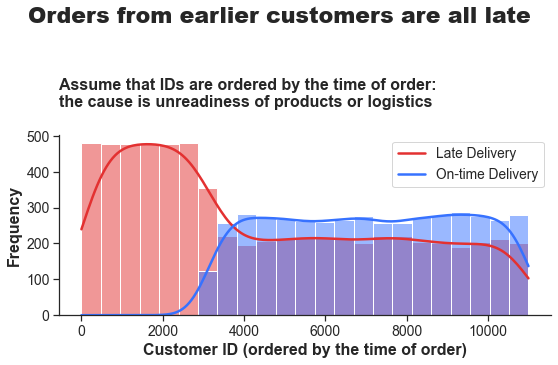

In [86]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=df, x='id', hue='late_delivery', alpha=0.5, kde=True, legend=False, palette=[blue,red])

plt.suptitle('Orders from earlier customers are all late',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Assume that IDs are ordered by the time of order:\nthe cause is unreadiness of products or logistics',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Frequency', fontsize=16, fontweight='semibold')
plt.xlabel('Customer ID (ordered by the time of order)', fontsize=16, fontweight='semibold')
# plt.xticks(rotation=0, ticks=np.arange(4), labels=labels) # labels
# plt.ylim(0,0.00020)

plt.legend(title='', loc='upper right', labels=['Late Delivery', 'On-time Delivery'])
plt.tight_layout()
plt.show()

Insights:
- lower IDs were all late --> let's assume these IDs are in chronological order of the order time
- could this be because the shipment wasn't ready for these new orders?

In [87]:
low_id = df[df['id']<4000]
high_id = df[df['id']>=4000]

In [88]:
high_id[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7000.0,7499.500000,2020.870275,4000.0,5749.75,7499.5,9249.25,10999.0
customer_care_calls,7000.0,4.228143,1.183702,2.0,3.00,4.0,5.00,7.0
customer_rating,7000.0,2.998429,1.415778,1.0,2.00,3.0,4.00,5.0
cost_of_the_product,7000.0,217.693429,47.822339,96.0,178.00,226.0,256.00,310.0
prior_purchases,7000.0,3.713571,1.494989,2.0,3.00,3.0,4.00,10.0
discount_offered,7000.0,5.536000,2.883729,1.0,3.00,6.0,8.00,10.0
weight_in_gms,7000.0,4048.487143,1629.745069,1001.0,1924.00,4618.5,5297.00,6000.0
late_delivery,7000.0,0.435429,0.495848,0.0,0.00,0.0,1.00,1.0


In [89]:
low_id[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3999.0,2000.000000,1154.556192,1.0,1000.5,2000.0,2999.5,3999.0
customer_care_calls,3999.0,3.750438,0.993090,2.0,3.0,4.0,4.0,7.0
customer_rating,3999.0,2.976744,1.409859,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,3999.0,197.074519,45.612095,96.0,159.0,194.0,236.0,301.0
prior_purchases,3999.0,3.312078,1.537633,2.0,2.0,3.0,4.0,10.0
discount_offered,3999.0,27.091773,20.299911,1.0,8.0,23.0,45.0,65.0
weight_in_gms,3999.0,2908.512128,1371.151816,1001.0,1715.0,2715.0,3818.0,7846.0
late_delivery,3999.0,0.878970,0.326203,0.0,1.0,1.0,1.0,1.0


In [90]:
high_id[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,7000,5,F,2333
mode_of_shipment,7000,3,Ship,4756
product_importance,7000,3,low,3445
gender,7000,2,F,3557


In [91]:
low_id[cats].describe().transpose()

,count,unique,top,freq
warehouse_block,3999,5,F,1333
mode_of_shipment,3999,3,Ship,2706
product_importance,3999,3,low,1852
gender,3999,2,M,2011


In [92]:
late = df[df['late_delivery']==1]
late.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.0
mean,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104,1.0
std,3243.986559,1.122592,1.412692,48.054876,1.517285,19.108797,1576.148391,0.0
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,1641.500000,3.000000,2.000000,167.000000,3.000000,5.000000,1735.500000,1.0
50%,3467.000000,4.000000,3.000000,209.000000,3.000000,9.000000,3231.000000,1.0
75%,7194.500000,5.000000,4.000000,249.000000,4.000000,32.000000,4696.500000,1.0
max,10995.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.0


In [93]:
ontime = df[df['late_delivery']==0]
ontime.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.0
mean,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395,0.0
std,2278.543555,1.162771,1.414808,47.757432,1.525444,2.877727,1573.954178,0.0
min,3136.000000,2.000000,1.000000,97.000000,2.000000,1.000000,1001.000000,0.0
25%,5092.250000,3.000000,2.000000,174.000000,3.000000,3.000000,4043.500000,0.0
50%,7096.000000,4.000000,3.000000,222.000000,3.000000,6.000000,4674.000000,0.0
75%,9078.500000,5.000000,4.000000,254.000000,4.000000,8.000000,5337.000000,0.0
max,10999.000000,7.000000,5.000000,310.000000,10.000000,10.000000,6000.000000,0.0


In [94]:
early_id = df[df['id']<3000]
early_id.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.0
mean,1500.000000,3.741914,2.969990,195.848950,3.307436,33.163054,2361.877626,1.0
std,865.881054,0.994689,1.414367,45.691911,1.524379,18.915451,921.524629,0.0
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,750.500000,3.000000,2.000000,158.000000,2.000000,17.000000,1563.500000,1.0
50%,1500.000000,4.000000,3.000000,192.000000,3.000000,34.000000,2229.000000,1.0
75%,2249.500000,4.000000,4.000000,234.000000,4.000000,49.000000,3129.500000,1.0
max,2999.000000,7.000000,5.000000,296.000000,10.000000,65.000000,7846.000000,1.0


In [95]:
high_id = df[df['id']>=3000]
high_id.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6999.50000,4.171625,2.998250,215.575500,3.665125,5.954500,4110.909875,0.445500
std,2309.54541,1.170616,1.413328,47.828639,1.510884,5.010271,1588.925959,0.497052
min,3000.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,4999.75000,3.000000,2.000000,176.000000,3.000000,3.000000,3114.750000,0.000000
50%,6999.50000,4.000000,3.000000,223.000000,3.000000,6.000000,4636.000000,0.000000
75%,8999.25000,5.000000,4.000000,255.000000,4.000000,8.000000,5310.250000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,64.000000,6000.000000,1.000000


In [96]:
early_id[cats].describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,2999,2999,2999,2999
unique,5,3,3,2
top,F,Ship,low,F
freq,999,2046,1391,1525


In [97]:
high_id[cats].describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,8000,8000,8000,8000
unique,5,3,3,2
top,F,Ship,low,F
freq,2667,5416,3906,4020


<AxesSubplot:xlabel='id', ylabel='Density'>

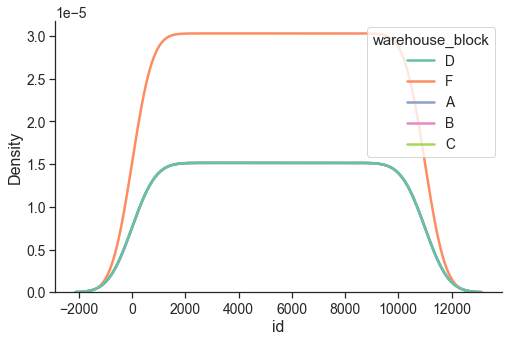

In [98]:
sns.kdeplot(data=df, x='id', hue='warehouse_block')

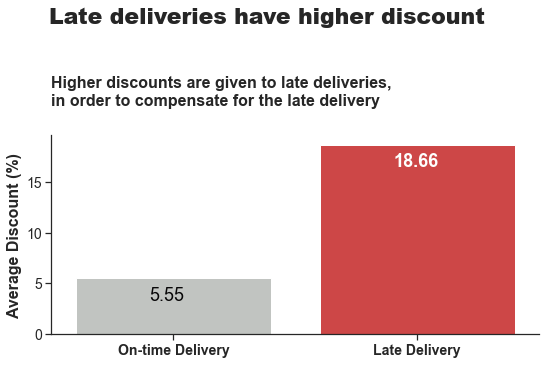

In [99]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='late_delivery', y='discount_offered', palette=[gray,red], ci=None)
for p in ax.patches:
  color=white if p.get_height()>15 else black
  fontweight='semibold' if p.get_height()>=15 else 'normal'
  ax.annotate(str(round(p.get_height(),2)), ((-0.1+p.get_x()+p.get_width()/2)*1.005, -2.25+(p.get_height() * 1.005)), color=color, fontsize=18, fontweight=fontweight)
  # print(p)

plt.suptitle('Late deliveries have higher discount',
             fontsize=22, fontweight='black', horizontalalignment='center', verticalalignment='top', y=1.02)
plt.title('Higher discounts are given to late deliveries,\nin order to compensate for the late delivery',
          fontsize=16, fontweight='semibold', loc='left', y=1.12)

plt.ylabel('Average Discount (%)', fontsize=16, fontweight='semibold')
plt.xlabel('', fontsize=16, fontweight='semibold')
plt.xticks(rotation=0, ticks=np.arange(2), labels=['On-time Delivery','Late Delivery'], fontweight='semibold') # labels

plt.tight_layout()
plt.show()

In [100]:
sorted(df['prior_purchases'].unique())

[2, 3, 4, 5, 6, 7, 8, 10]

In [101]:
df['prior_purchases'].value_counts(ascending=False, dropna=False)

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: prior_purchases, dtype: int64

In [102]:
df[df['prior_purchases']>=6].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,5823.365902,4.075773,3.030907,210.931206,7.100698,12.677966,3617.759721,0.589232
std,3153.688303,1.039270,1.390028,47.147476,1.508734,15.752926,1631.340147,0.492219
min,38.000000,2.000000,1.000000,97.000000,6.000000,1.000000,1003.000000,0.000000
25%,3100.000000,3.000000,2.000000,174.000000,6.000000,4.000000,1850.500000,0.000000
50%,6071.000000,4.000000,3.000000,220.000000,6.000000,7.000000,4165.000000,1.000000
75%,8520.500000,5.000000,4.000000,250.000000,8.000000,10.000000,5002.500000,1.000000
max,10998.000000,6.000000,5.000000,293.000000,10.000000,65.000000,5995.000000,1.000000


In [103]:
df[df['prior_purchases']<6].describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,late_delivery
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5467.553421,4.052321,2.986495,210.123149,3.213085,13.442977,3635.647959,0.597439
std,3175.780254,1.151272,1.415952,48.155901,0.972258,16.249371,1635.854290,0.490438
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2720.750000,3.000000,2.000000,169.000000,2.000000,4.000000,1837.750000,0.000000
50%,5445.500000,4.000000,3.000000,213.000000,3.000000,7.000000,4147.500000,1.000000
75%,8224.250000,5.000000,4.000000,251.000000,4.000000,10.000000,5054.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,5.000000,65.000000,7846.000000,1.000000


# Data Preprocessing

In [1812]:
df = df.drop(columns='id', axis=1)
df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,late_delivery
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Handling outlier data

In [2091]:
nums = [col for col in nums if col not in ['late_delivery','id']]

In [2092]:
# lakukan pembuangan outlier menggunakan metode yang dipilih
print(f'Rows before filtering outliers: {len(df)}')
filtered_entries = np.array([True] * len(df[nums]))
for col in df[nums].columns:
    zscore = abs(st.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries # keeping absolute z score under 
filtered_df = df[filtered_entries].copy() # filter z score under 3
print(f'Rows after filtering outliers: {len(filtered_df)}')

Rows before filtering outliers: 10999
Rows after filtering outliers: 10642


customer_care_calls


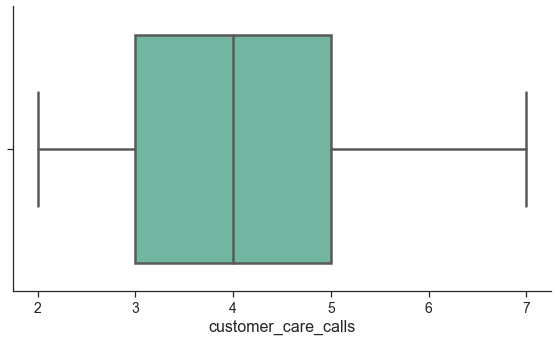

customer_rating


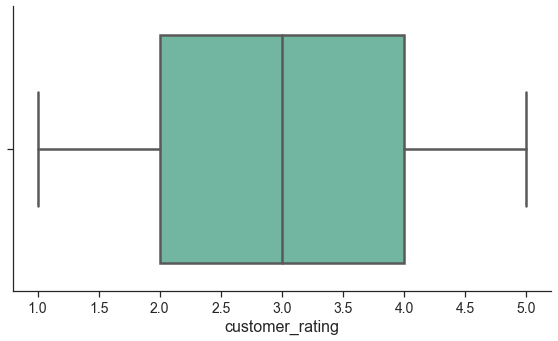

cost_of_the_product


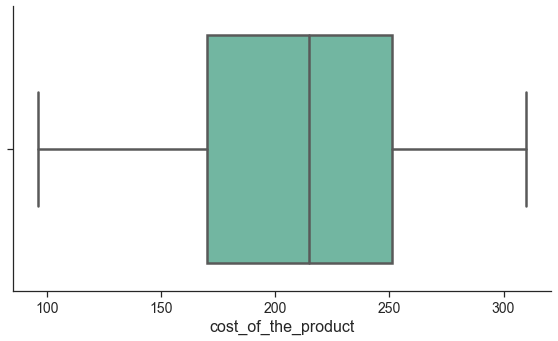

prior_purchases


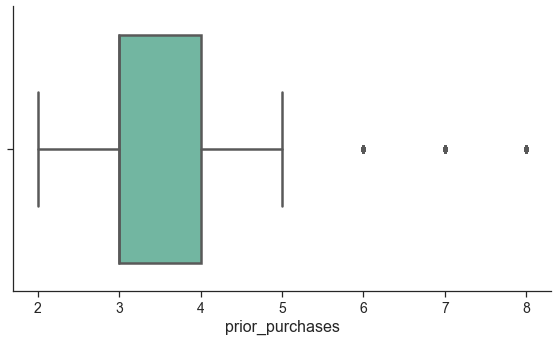

discount_offered


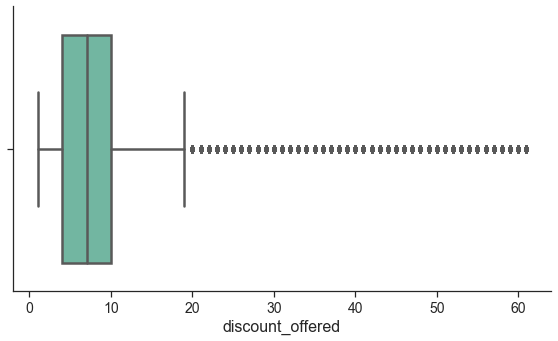

weight_in_gms


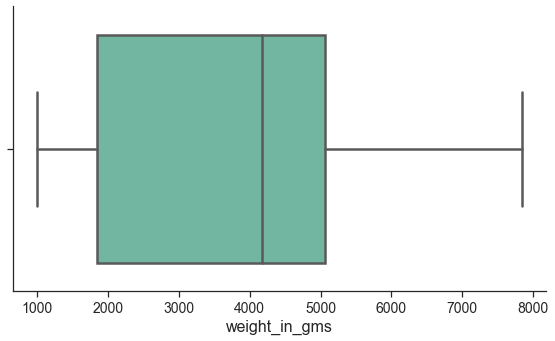

In [2093]:
# plot boxplot hasil membuang outlier
for col in nums:
  print(col)
  sns.boxplot(data=filtered_df, x=col)
  plt.tight_layout()
  plt.show()

## Handling imbalance data

In [2094]:
pd.Series(filtered_df['late_delivery']).value_counts()

1    6282
0    4360
Name: late_delivery, dtype: int64

In [2095]:
i_cats = [i for i,col in enumerate(filtered_df.columns) if col in cats]

In [2096]:
from imblearn import over_sampling, under_sampling
X_sampled, y_sampled = over_sampling.SMOTENC(categorical_features=i_cats, sampling_strategy=1, random_state=42).fit_resample(
    filtered_df[[col for col in filtered_df if col not in ['late_delivery']]], filtered_df['late_delivery'])
# X_sampled, y_sampled = under_sampling.RandomUnderSampler(sampling_strategy='auto', random_state=42).fit_resample(
#     filtered_df[[col for col in filtered_df if col not in ['late_delivery']]], filtered_df['late_delivery'])

In [2097]:
print('Sampled')
print(pd.Series(y_sampled).value_counts())

Sampled
1    6282
0    6282
Name: late_delivery, dtype: int64


## Splitting Data

Agar tidak terjadi data leak, ada perlunya data dibagi menjadi train set dan test set terlebih dahulu.

In [2098]:
# selected_features = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'id', 'discount_offered', 'weight_in_gms']
# X = df[selected_features]
X, y = X_sampled, y_sampled
X.shape, y.shape

((12564, 10), (12564,))

In [2099]:
from sklearn.model_selection import train_test_split
random_state = 42
stratify = y
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.3, random_state=random_state, stratify=stratify)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((3770, 10), (8794, 10), (3770,), (8794,))

## Hasil EDA

Dari EDA yang dilakukan, dapat disimpulkan bahwa terdapat beberapa tahap data preprocessing yang harus dilakukan untuk membantu proses machine learning modelling nantinya. Kesimpulan dari EDA beserta treatmentnya adalah sebagai berikut:

- Missing values --> tidak ada
- Duplicated data --> tidak ada
- Outlier data --> ada
  - Z-score
  - 1.5 * IQR
  - 3 * IQR
  - Tidak membuang outlier
- Imbalance target data --> 40 non late delivery:60 late delivery
  - SMOTE
  - Tidak melakukan class balancing
- Redundant data --> tidak ada
- Transforming distributions
  - Right / Left skew
    - Moderate skew : np.sqrt(x) / np.sqrt((df.col.max()+1) - x)
    - Medium skew: np.log(x) / np.log((df.col.max()+1) - x)
    - Severe skew: 1/x / 1/((df.col.max()+1)-x)
  - Bimodal
    - abs(x) - df.col.mean()
    
  - **Try BoxCox Transformation**
- Encoding
  - One hot encoding / pd.get_dummies untuk warehouse_block, mode_of_shipment, product_importance
  - Label encoding untuk gender
- Scaling / Normalizing
  - [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) - belum terdistribusi normal
  - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - sudah terdistribusi normal
  - [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)



Note: transformasi yang dilakukan pada train set harus dilakukan pada test set juga
- outlier harus dibuang sebelum split data
- test set tidak perlu class balancing (training saja di class balancing)
- test set harus melalui transformasi distribusi menggunakan metode yang sama
- test set harus di-scale/normalize menggunakan INSTANTIATED OBJECT yang sebelumnya sudah di-fit pada train set (transform test set menggunakan scaler yang sama tanpa harus fit lagi)

## Handling other data issues

### Transforming Distributions

In [2100]:
# Transformasi sesuai hasil EDA

In [2101]:
X_train['trf_weight_in_gms'] = X_train['weight_in_gms'].apply(lambda x: np.sqrt(x))

In [2102]:
X_train['trf_prior_purchases'] = X_train['prior_purchases'].apply(lambda x: np.sqrt(x))

In [2103]:
X_train['trf_discount_offered'] = X_train['discount_offered'].apply(lambda x: np.sqrt(x))

In [2104]:
X_train['trf_cost_of_the_product'] = X_train['cost_of_the_product'].apply(lambda x: np.sqrt(x))

### Scaling / Normalizing

In [2105]:
# lakukan scaling/normalizing menggunakan metode yang dipilih
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [2106]:
nums1 = [col for col in X_train.columns if X_train[col].dtype != 'object']
scaler.fit(X_train[nums1])
X_train_scaled = scaler.transform(X_train[nums1])
X_train[nums1] = X_train_scaled
X_train.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product
10972,F,Ship,0.20,0.50,0.74,0.17,medium,F,0.12,0.57,0.68,0.22,0.27,0.79
3963,D,Road,0.00,0.75,0.70,0.00,medium,M,0.00,0.64,0.73,0.00,0.00,0.75
6890,F,Ship,0.60,0.50,0.76,0.50,low,F,0.05,0.10,0.16,0.58,0.15,0.80
11035,A,Ship,0.20,0.75,0.26,0.33,low,F,0.07,0.00,0.00,0.41,0.18,0.32
11004,A,Ship,0.40,0.25,0.74,0.17,high,F,0.08,0.56,0.67,0.22,0.21,0.79


customer_care_calls


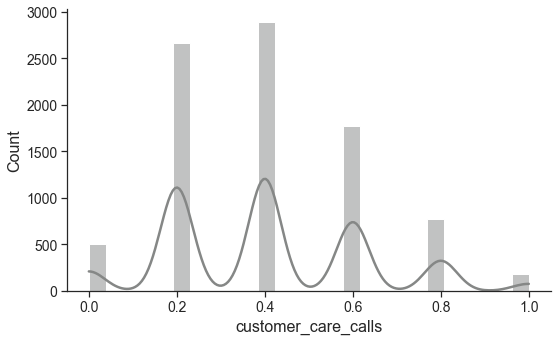

customer_rating


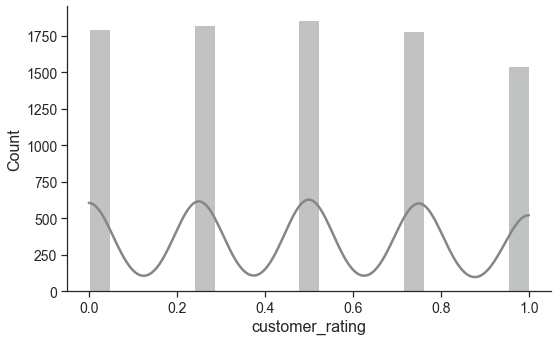

cost_of_the_product


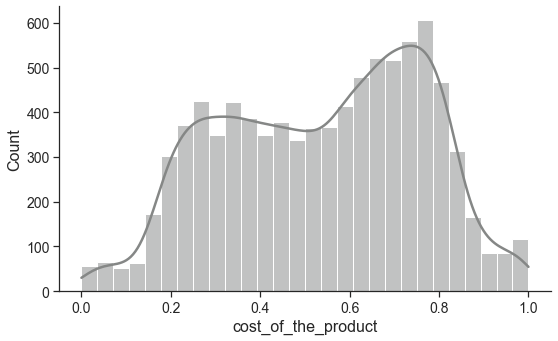

prior_purchases


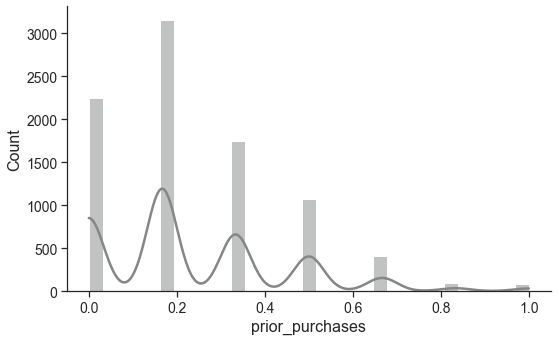

discount_offered


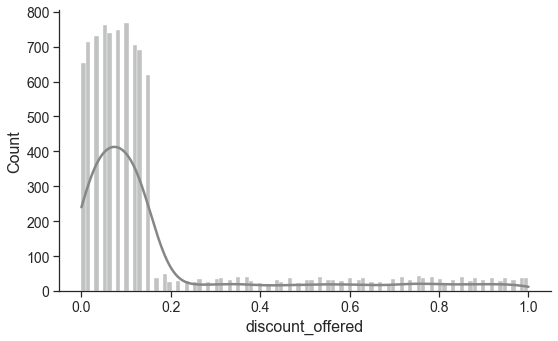

weight_in_gms


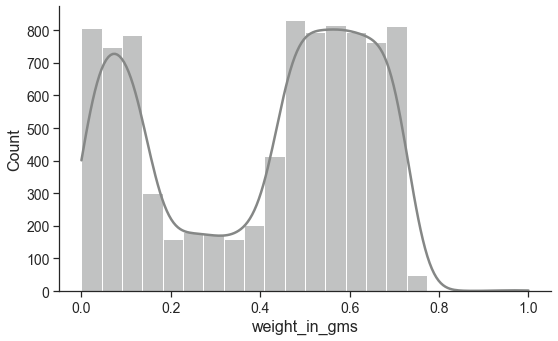

trf_weight_in_gms


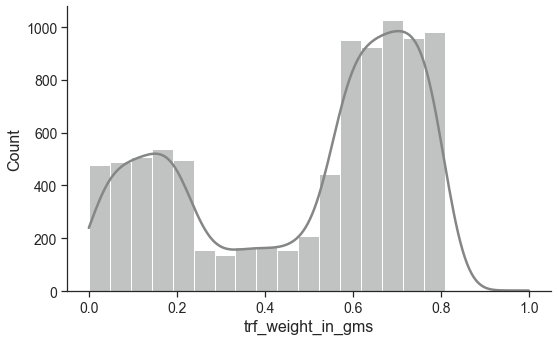

trf_prior_purchases


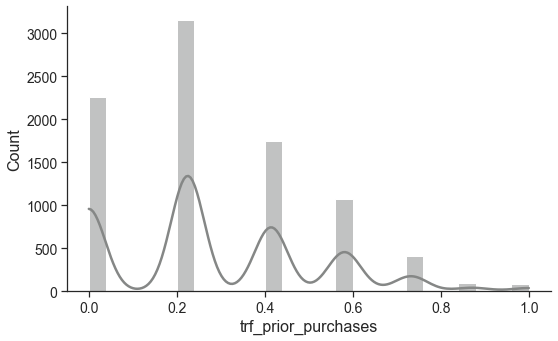

trf_discount_offered


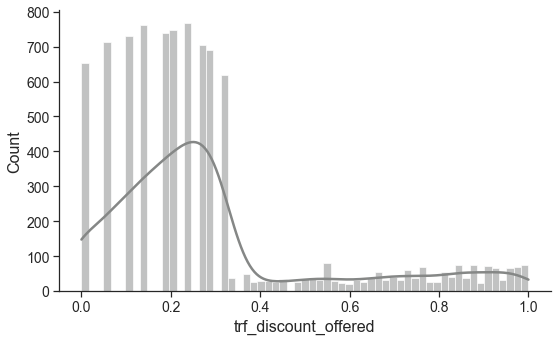

trf_cost_of_the_product


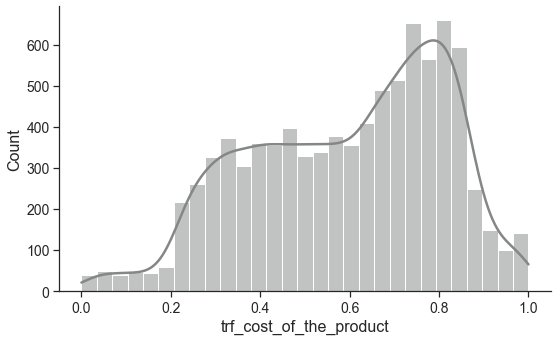

In [2107]:
# plot histogram (univariate) hasil transformasi

for col in X_train.columns:
  if X_train[col].dtype != 'object':
    print(col)
    sns.histplot(data=X_train, x=col, kde=True, color=darkgray)
    plt.tight_layout()
    plt.show()

### Encoding

In [2108]:
# label encoding

In [2109]:
from sklearn.preprocessing import LabelEncoder
labels = ['gender']
encoders = []
for i,label in enumerate(labels):
    i = LabelEncoder()
    i.fit(X_train[label])
    X_train[label] = i.transform(X_train[label])
    encoders.append(i)

In [2110]:
# one hot encoding / pd.get dummies

In [2111]:
from sklearn.preprocessing import OneHotEncoder
onehotcats = [col for col in cats if col not in labels]
ohe = OneHotEncoder(drop=None, sparse=False).fit(X_train[onehotcats])

In [2112]:
X_train_ohe = ohe.transform(X_train[onehotcats])
to_merge = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(onehotcats))
X_train = X_train.reset_index().drop('index', axis=1)
X_train[ohe.get_feature_names(onehotcats)] = to_merge
X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
X_train.head()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium
0,0.20,0.50,0.74,0.17,0,0.12,0.57,0.68,0.22,0.27,0.79,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
1,0.00,0.75,0.70,0.00,1,0.00,0.64,0.73,0.00,0.00,0.75,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.60,0.50,0.76,0.50,0,0.05,0.10,0.16,0.58,0.15,0.80,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3,0.20,0.75,0.26,0.33,0,0.07,0.00,0.00,0.41,0.18,0.32,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,0.40,0.25,0.74,0.17,0,0.08,0.56,0.67,0.22,0.21,0.79,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


In [2113]:
X_train.shape

(8794, 22)

## Conclusion of Data Preprocessing

Pada tahap data preprocessing, untuk setiap masalah pada data saya melakukan treatment sebagai berikut:
- Outlier --> filtering Z-score < 3
- Class balancing --> 0.8
- Distribution transformation:
  - weight in gms --> inverse (1/median if x==0)
  - prior purchases --> np.sqrt
  - discount offered --> inverse (1/median if x==0)
- Normalize --> MinMaxScaler
- LabelEncoder --> gender
- OneHotEncoder (drop=first) --> all categorical columns except gender

## Handling Test Set

In [2114]:
# lakukan handling yang sama pada test set

In [2115]:
X_test['trf_weight_in_gms'] = X_test['weight_in_gms'].apply(lambda x: np.sqrt(x))

In [2116]:
X_test['trf_prior_purchases'] = X_test['prior_purchases'].apply(lambda x: np.sqrt(x))

In [2117]:
X_test['trf_discount_offered'] = X_test['discount_offered'].apply(lambda x: np.sqrt(x))

In [2118]:
X_test['trf_cost_of_the_product'] = X_test['cost_of_the_product'].apply(lambda x: np.sqrt(x))

In [2119]:
X_test_scaled = scaler.transform(X_test[nums1])
X_test[nums1] = X_test_scaled
X_test.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product
11958,F,Ship,0.40,1.00,0.63,0.00,medium,M,0.08,0.71,0.79,0.00,0.21,0.69
9187,A,Ship,0.20,1.00,0.76,0.17,low,F,0.07,0.51,0.62,0.22,0.18,0.80
11198,F,Ship,0.60,0.75,0.71,0.33,low,F,0.13,0.00,0.00,0.41,0.29,0.76
11764,C,Ship,0.60,0.25,0.80,0.50,low,M,0.07,0.05,0.09,0.58,0.18,0.84
11120,B,Ship,0.20,0.25,0.81,0.17,medium,F,0.08,0.72,0.79,0.22,0.21,0.85


In [2120]:
for i, label in enumerate(labels):
    X_test[label] = encoders[i].transform(X_test[label])

In [2121]:
X_test_ohe = ohe.transform(X_test[onehotcats])
to_merge = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(onehotcats))
X_test = X_test.reset_index().drop('index', axis=1)
X_test[ohe.get_feature_names(onehotcats)] = to_merge
X_test = X_test[[col for col in X_test if col not in onehotcats]].copy()
X_test.head()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,gender,discount_offered,weight_in_gms,trf_weight_in_gms,trf_prior_purchases,trf_discount_offered,trf_cost_of_the_product,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium
0,0.40,1.00,0.63,0.00,1,0.08,0.71,0.79,0.00,0.21,0.69,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
1,0.20,1.00,0.76,0.17,0,0.07,0.51,0.62,0.22,0.18,0.80,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.60,0.75,0.71,0.33,0,0.13,0.00,0.00,0.41,0.29,0.76,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3,0.60,0.25,0.80,0.50,1,0.07,0.05,0.09,0.58,0.18,0.84,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,0.20,0.25,0.81,0.17,0,0.08,0.72,0.79,0.22,0.21,0.85,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [2122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8794, 22), (3770, 22), (8794,), (3770,))

# Feature Selection

## Chi Squared

In [2123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2124]:
features_cat = [col for col in np.concatenate((labels,ohe.get_feature_names(onehotcats))) if col in X_train.columns]
select = SelectKBest(score_func=chi2, k='all')
selector = select.fit(X_train[features_cat], y_train)

In [2125]:
scores = pd.DataFrame(features_cat)
scores['score'] = selector.scores_
scores = scores.sort_values('score', ascending=False)

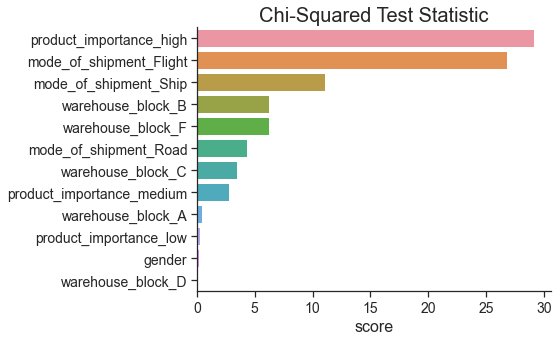

In [2126]:
sns.barplot(data=scores, x='score', y=0)
plt.title('Chi-Squared Test Statistic')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [2127]:
filtered_score = scores[scores['score']>=2.5]
filtered_score[0].values

array(['product_importance_high', 'mode_of_shipment_Flight',
       'mode_of_shipment_Ship', 'warehouse_block_B', 'warehouse_block_F',
       'mode_of_shipment_Road', 'warehouse_block_C',
       'product_importance_medium'], dtype=object)

In [2128]:
features_cat = filtered_score[0].values

## Feature Importance (Boruta)

In [2129]:
features_num = [col for col in X_train.columns if col not in np.concatenate((labels,ohe.get_feature_names(onehotcats)))]

In [2130]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rf = RandomForestClassifier(n_jobs=-1, class_weight=None , max_depth=5)
# rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train[features_num], y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1)

In [2131]:
brt = BorutaPy(rf, n_estimators='auto', random_state=42)
brt.fit(np.array(X_train[features_num]), np.array(y_train))
brt_ranking = brt.ranking_

<AxesSubplot:>

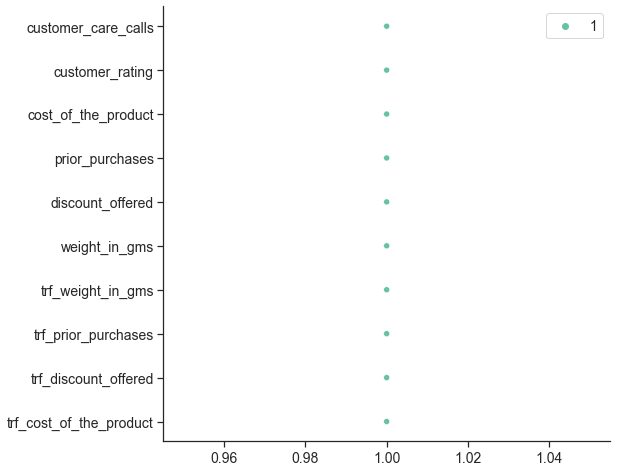

In [2132]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=[col for col in X_train[features_num].columns.values], x=brt_ranking, hue=brt_ranking)

In [2133]:
selected_features = {}
for i, col in enumerate(X_train[features_num].columns):
    if brt_ranking[i] <= 1:
        selected_features[col] = brt_ranking[i]
selected_features

{'customer_care_calls': 1,
 'customer_rating': 1,
 'cost_of_the_product': 1,
 'prior_purchases': 1,
 'discount_offered': 1,
 'weight_in_gms': 1,
 'trf_weight_in_gms': 1,
 'trf_prior_purchases': 1,
 'trf_discount_offered': 1,
 'trf_cost_of_the_product': 1}

In [2134]:
features_num = [k for k in selected_features.keys()]
features_num

['customer_care_calls',
 'customer_rating',
 'cost_of_the_product',
 'prior_purchases',
 'discount_offered',
 'weight_in_gms',
 'trf_weight_in_gms',
 'trf_prior_purchases',
 'trf_discount_offered',
 'trf_cost_of_the_product']

In [2135]:
features = np.concatenate((features_cat, features_num))
features

array(['product_importance_high', 'mode_of_shipment_Flight',
       'mode_of_shipment_Ship', 'warehouse_block_B', 'warehouse_block_F',
       'mode_of_shipment_Road', 'warehouse_block_C',
       'product_importance_medium', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'discount_offered', 'weight_in_gms', 'trf_weight_in_gms',
       'trf_prior_purchases', 'trf_discount_offered',
       'trf_cost_of_the_product'], dtype=object)

## Multicollinearity

<AxesSubplot:>

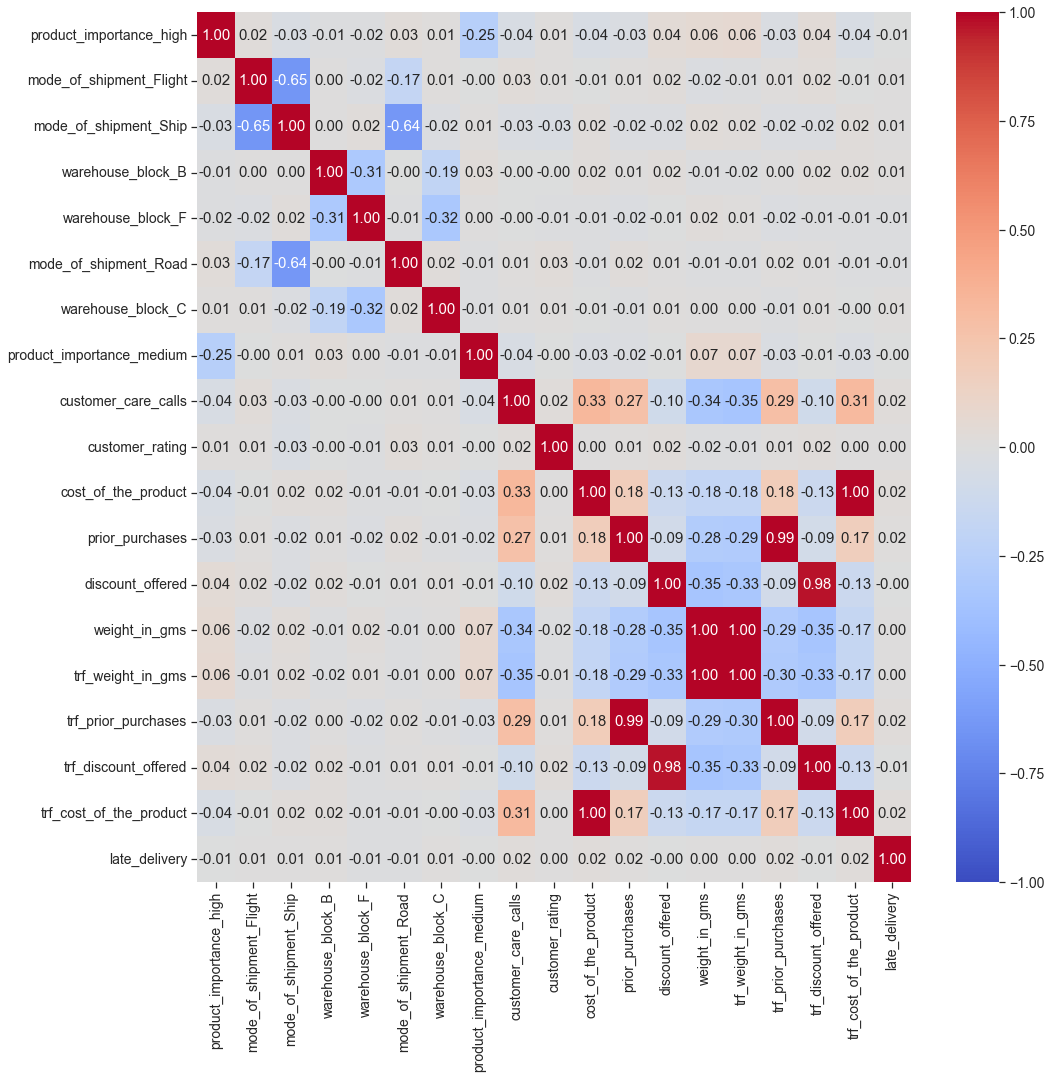

In [2136]:
plt.figure(figsize=(16,16))
temp = X_train[features].copy()
temp['late_delivery'] = y_train.copy()
sns.heatmap(temp.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f')

In [2137]:
to_drop = [
    'id',
    'trf_cost_of_the_product',
 'trf_prior_purchases',
 'trf_discount_offered',
 'trf_weight_in_gms',
]

features1 = [col for col in features if col not in to_drop]

In [2171]:
feat = features1
feat

['product_importance_high',
 'mode_of_shipment_Flight',
 'mode_of_shipment_Ship',
 'warehouse_block_B',
 'warehouse_block_F',
 'mode_of_shipment_Road',
 'warehouse_block_C',
 'product_importance_medium',
 'customer_care_calls',
 'customer_rating',
 'cost_of_the_product',
 'prior_purchases',
 'discount_offered',
 'weight_in_gms']

# Machine Learning

## Model Selection - Lazypredict

In [2139]:
# untuk pertama kali
# run code di bawah ini
# dan restart runtime kalau perlu
# baru import

# !pip install lazypredict

In [2140]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import precision_score, recall_score

In [2141]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=recall_score)
models, predictions = clf.fit(X_train[feat], X_test[feat], y_train, y_test)
print(models)

 28%|██▊       | 8/29 [00:02<00:05,  3.67it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 93%|█████████▎| 27/29 [00:23<00:01,  1.13it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:24<00:00,  1.17it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  recall_score  Time Taken
Model                                                                                                  
AdaBoostClassifier                 0.73               0.73     0.73      0.72          0.53        0.38
LGBMClassifier                     0.73               0.73     0.73      0.72          0.55        0.29
RandomForestClassifier             0.72               0.72     0.72      0.72          0.59        0.91
XGBClassifier                      0.71               0.71     0.71      0.71          0.60        0.59
BaggingClassifier                  0.71               0.71     0.71      0.71          0.58        0.26
SVC                                0.71               0.71     0.71      0.69          0.48        3.14
BernoulliNB                        0.71               0.71     0.71      0.70          0.55        0.02
QuadraticDiscriminantAnalysis      0.71               0.71     0

## Strong Learners

In [2142]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [2143]:
# weak learners
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

log = LogisticRegression()
qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

estimators = [
    ("LOG", log),
#     ("QDA", qda),
    ("GNB", gnb),
#     ("KNN", knc),
    ("DTC", dtc),
    ("RFC", rfc)
]

In [2144]:
dt = DecisionTreeClassifier()
et = ExtraTreeClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
ets = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
# iso = IsolationForest()
rf = RandomForestClassifier()
sta = StackingClassifier(estimators, final_estimator=rf)
vot = VotingClassifier(estimators, voting='soft')
hgbc = HistGradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()

models=[
    dt,et,ada,bag,ets,gbc,rf,sta,vot,hgbc,xgb,xgbrf
]

## Cross Validation

In [2145]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score

In [2146]:
from sklearn.model_selection import cross_val_score, KFold
def model_evaluation(model, X_train, y_train, scoring='recall_micro', cv=5):
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
    avg_res = abs(np.mean(cv_results))
    return avg_res

In [2147]:
results = []
print('CROSS VALIDATED MICRO RECALL SCORES ON TRAINING DATA:\n')
for i, model in enumerate(models):
    result = model_evaluation(model, X_train[feat], y_train)
    print(model,':',result)

CROSS VALIDATED MICRO RECALL SCORES ON TRAINING DATA:

DecisionTreeClassifier() : 0.6621538766014664
ExtraTreeClassifier() : 0.636684342704285
AdaBoostClassifier() : 0.7104828022437508
BaggingClassifier() : 0.7100280630542356
ExtraTreesClassifier() : 0.691266239414912
GradientBoostingClassifier() : 0.7203761445282865
RandomForestClassifier() : 0.7067297002058647
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.689445795101545
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.7062763838953381
HistGradien

In [2148]:
results = []
print('CROSS VALIDATED ROC AUC SCORES ON TRAINING DATA:\n')
for i, model in enumerate(models):
    result = model_evaluation(model, X_train[feat], y_train, scoring='roc_auc')
    print(model,':',result)

CROSS VALIDATED ROC AUC SCORES ON TRAINING DATA:

DecisionTreeClassifier() : 0.6635183317819837
ExtraTreeClassifier() : 0.6263362291860586
AdaBoostClassifier() : 0.7632539178491811
BaggingClassifier() : 0.7634652974785068
ExtraTreesClassifier() : 0.7578198518869931
GradientBoostingClassifier() : 0.7741642643396303
RandomForestClassifier() : 0.7725649194539485
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.7476332147259737
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.7636529872570479
HistGradientB

## Prediction

In [2149]:
test_results = []
print('RECALL SCORES ON TEST DATA:\n')
for model in models:
    model.fit(X_train[feat], y_train)
    y_pred = model.predict(X_test[feat])
    test_results.append(recall_score(y_test, y_pred, average='micro'))
for i, model in enumerate(models):
    print(model, ':', test_results[i])

RECALL SCORES ON TEST DATA:

DecisionTreeClassifier() : 0.6586206896551724
ExtraTreeClassifier() : 0.629973474801061
AdaBoostClassifier() : 0.7328912466843501
BaggingClassifier() : 0.7180371352785145
ExtraTreesClassifier() : 0.7021220159151194
GradientBoostingClassifier() : 0.7328912466843501
RandomForestClassifier() : 0.7212201591511936
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.6962864721485411
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.7148541114058355
HistGradientBoostingClassifier() : 

In [2150]:
test_results = []
print('ROC AUC SCORES ON TEST DATA:\n')
for model in models:
    model.fit(X_train[feat], y_train)
    y_pred = model.predict(X_test[feat])
    test_results.append(roc_auc_score(y_test, y_pred))
for i, model in enumerate(models):
    print(model, ':', test_results[i])

ROC AUC SCORES ON TEST DATA:

DecisionTreeClassifier() : 0.6644562334217508
ExtraTreeClassifier() : 0.6387267904509284
AdaBoostClassifier() : 0.7328912466843502
BaggingClassifier() : 0.7021220159151194
ExtraTreesClassifier() : 0.7034482758620689
GradientBoostingClassifier() : 0.7328912466843501
RandomForestClassifier() : 0.7143236074270557
StackingClassifier(estimators=[('LOG', LogisticRegression()),
                               ('GNB', GaussianNB()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()) : 0.692838196286472
VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('GNB', GaussianNB()),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())],
                 voting='soft') : 0.7124668435013263
HistGradientBoostingClassifier() :

In [2151]:
model = xgbrf
y_pred = model.predict(X_test[feat])

In [2152]:
print(classification_report(y_test, y_pred, labels=sorted(model.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.95      0.49      0.65      1885
      Ontime       0.66      0.97      0.78      1885

    accuracy                           0.73      3770
   macro avg       0.80      0.73      0.72      3770
weighted avg       0.80      0.73      0.72      3770



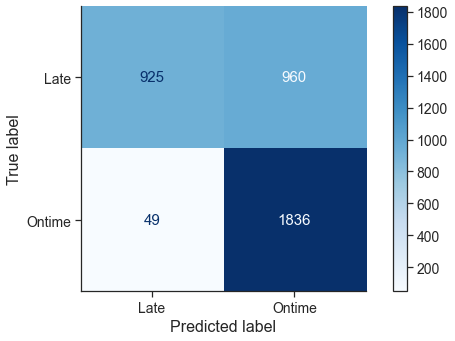

In [2153]:
cm = confusion_matrix(y_test, y_pred, labels=sorted(model.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [2154]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2155]:
model = xgbrf
model

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [2156]:
params = dict(
    booster = ['dart'],
    eta = [0.1,0.3],
    gamma = [0.1,0.2],
    max_depth = [7,8],
    min_child_weight = [0.9,1],
    max_delta_step = [0,0.1],
    subsample = [0.65,0.7],
    tree_method = ['hist'],
    scale_pos_weight = [1.55],
    random_state = [42],
    n_jobs = [-1],
    objective = ['binary:logistic'],
    max_bin = [1024,4096],
    reg_lambda = [0.5],
    reg_alpha = [0.7],
    
#     sample_type = ['uniform'],
#     normalize_type = ['tree'],
#     rate_drop = [0],
#     one_drop = [0],
#     skip_drop = [0]
)

In [2157]:
gs = GridSearchCV(estimator=model, param_grid=params, verbose=1, cv=5, n_jobs=-1, scoring='recall_micro')
model1 = gs.fit(X_train[feat], y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.3min finished


In [2158]:
y_pred1 = model1.predict(X_test[feat])

In [2159]:
print(model1.best_estimator_)
print(model1.best_params_)
print(model1.scorer_, abs(model1.best_score_))
print(roc_auc_score(y_test, y_pred1))

XGBRFClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
                colsample_bytree=1, eta=0.1, gamma=0.1, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                max_bin=1024, max_delta_step=0, max_depth=7,
                min_child_weight=0.9, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=-1, num_parallel_tree=100,
                objective='binary:logistic', random_state=42, reg_alpha=0.7,
                reg_lambda=0.5, scale_pos_weight=1.55, subsample=0.65,
                tree_method='hist', validate_parameters=1, verbosity=None)
{'booster': 'dart', 'eta': 0.1, 'gamma': 0.1, 'max_bin': 1024, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 0.9, 'n_jobs': -1, 'objective': 'binary:logistic', 'random_state': 42, 'reg_alpha': 0.7, 'reg_lambda': 0.5, 'scale_pos_weight': 1.55, 'subsample': 0.65, 'tree_method': 'hist'}
make_scorer(recall_score, pos_label=None, average=micro) 0.70070329027

In [2160]:
print(classification_report(y_test, y_pred1, labels=sorted(model1.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.74      0.63      0.68      1885
      Ontime       0.68      0.78      0.72      1885

    accuracy                           0.70      3770
   macro avg       0.71      0.70      0.70      3770
weighted avg       0.71      0.70      0.70      3770



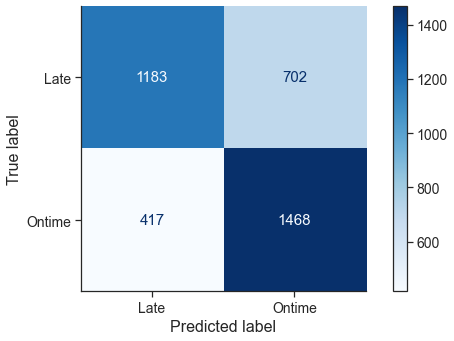

In [2161]:
cm = confusion_matrix(y_test, y_pred1, labels=sorted(model1.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning 2

In [2162]:
# weak learners
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

log = LogisticRegression()
# qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
# knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

estimators = [
    ("LOG", log),
#     ("QDA", qda),
    ("GNB", gnb),
    ("DTC", dtc),
    ("RFC", rfc)
]

In [2163]:
final_estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=400, random_state=42)

In [2164]:
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# stack.fit(X_train[feat], y_train)

In [2165]:
params = dict(
#     LOG__penalty = ['l1', 'l2', 'elasticnet'],
    LOG__C = [0.7,0.8],
#     QDA__reg_param = [0.2,0.5],
    GNB__var_smoothing = np.logspace(-8,-9, num=4),
    DTC__max_depth = [7,9],
#     DTC__min_samples_split = [0.5,0.7],
#     RFC__n_estimators = [120,150,200],
    RFC__max_depth = [5,7],
#     RFC__min_samples_split = [0.5,0.7],
)

In [2166]:
gs = GridSearchCV(estimator=stack, param_grid=params, verbose=1, cv=5, n_jobs=-1, scoring='recall_micro')
model2 = gs.fit(X_train[feat], y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.6min finished


In [2167]:
y_pred2 = model2.predict(X_test[feat])

In [2168]:
print(model2.best_estimator_)
print(model2.best_params_)
print(model2.scorer_, abs(model2.best_score_))
print(roc_auc_score(y_test, y_pred2))

StackingClassifier(estimators=[('LOG', LogisticRegression(C=0.7)),
                               ('GNB', GaussianNB(var_smoothing=1e-08)),
                               ('DTC', DecisionTreeClassifier(max_depth=7)),
                               ('RFC', RandomForestClassifier(max_depth=7))],
                   final_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                      learning_rate=0.1,
                                                      n_estimators=400,
                                                      random_state=42))
{'DTC__max_depth': 7, 'GNB__var_smoothing': 1e-08, 'LOG__C': 0.7, 'RFC__max_depth': 7}
make_scorer(recall_score, pos_label=None, average=micro) 0.6776205065319847
0.6793103448275861


In [2169]:
print(classification_report(y_test, y_pred2, labels=sorted(model2.classes_, reverse=True), target_names=['Late','Ontime']))

              precision    recall  f1-score   support

        Late       0.70      0.63      0.66      1885
      Ontime       0.66      0.73      0.69      1885

    accuracy                           0.68      3770
   macro avg       0.68      0.68      0.68      3770
weighted avg       0.68      0.68      0.68      3770



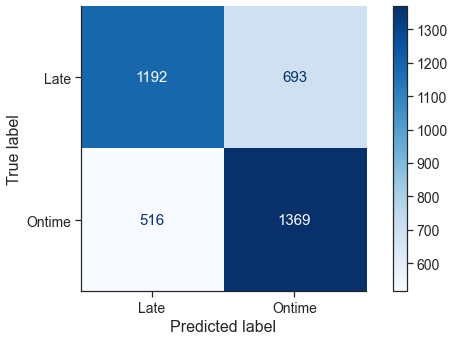

In [2170]:
cm = confusion_matrix(y_test, y_pred2, labels=sorted(model2.classes_, reverse=True))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Late','Ontime'])
disp.plot(cmap='Blues')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

In [2172]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()

In [ ]:
params = dict(
    n_estimators=
)

In [ ]:
gs = GridSearchCV(estimator=stack, param_grid=params, verbose=1, cv=5, n_jobs=-1, scoring='recall_micro')
model2 = gs.fit(X_train[feat], y_train)